## **EDA - Muertes Violentas 2023**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import openpyxl

from fancyimpute import KNN, IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [24]:
data = pd.read_excel('C:/Users/migue/OneDrive/Documents/Data_Pasantia_Kill/data/01-raw/MuertesViolentas2023.xlsx')
data.head(3)

Tipo Muert.    Zona         Subzona          Distrito          Circuito  \
0   ASESINATO  ZONA 8  D.M. GUAYAQUIL  NUEVA PROSPERINA  NUEVA PROSPERINA   
1   ASESINATO  ZONA 8  D.M. GUAYAQUIL  NUEVA PROSPERINA  NUEVA PROSPERINA   
2   ASESINATO  ZONA 8  D.M. GUAYAQUIL           PORTETE             CISNE   

  Cod. Subcircu         Subcircuito Provincia  código de provincia     Cantón  \
0   09D08C01S03  NUEVA PROSPERINA 3    GUAYAS                    9  GUAYAQUIL   
1   09D08C01S03  NUEVA PROSPERINA 3    GUAYAS                    9  GUAYAQUIL   
2   09D04C01S02             CISNE 2    GUAYAS                    9  GUAYAQUIL   

   ...  Estado Civil  Nacionalidad  Discapacidad  Prof Reg Civ  Instrucción  \
0  ...       SOLTERO       ECUADOR       NINGUNA     JORNALERO     SIN_DATO   
1  ...       SOLTERO       ECUADOR       NINGUNA       NINGUNA     SIN_DATO   
2  ...       SOLTERO       ECUADOR       NINGUNA    ESTUDIANTE     SIN_DATO   

  Antecedentes Anio_i  Mes_i Hora Rango Edad  
0           SI   2023  enero    0      42-46  
1           NO   2023  enero    0        1-5  
2           NO   2023  enero    6      14-18  

[3 rows x 40 columns]

In [25]:
# Verificamos la información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Tipo Muert.            2320 non-null   object        
 1   Zona                   2320 non-null   object        
 2   Subzona                2320 non-null   object        
 3   Distrito               2320 non-null   object        
 4   Circuito               2320 non-null   object        
 5   Cod. Subcircu          2320 non-null   object        
 6   Subcircuito            2320 non-null   object        
 7   Provincia              2320 non-null   object        
 8   código de provincia    2320 non-null   int64         
 9   Cantón                 2320 non-null   object        
 10  código de cantón       2320 non-null   int64         
 11  Coord. Y               2320 non-null   float64       
 12  Coord. X               2320 non-null   float64       
 13  Coo

In [26]:
# Verificamos la distribución de las variables numéricas
display(data.describe().T)

count                           mean  \
código de provincia  2320.0                            9.0   
código de cantón     2320.0                          901.0   
Coord. Y             2320.0                      -2.190297   
Coord. X             2320.0                       -79.9433   
Coord. Y Rev         2320.0                      -2.190333   
Coord. X Rev         2320.0                     -79.943355   
Fecha Infracción       2320  2023-06-29 08:58:08.275862272   
Edad                 2320.0                      29.181897   
Anio_i               2320.0                         2023.0   
Hora                 2320.0                      14.343534   

                                     min                  25%  \
código de provincia                  9.0                  9.0   
código de cantón                   901.0                901.0   
Coord. Y                        -3.00969            -2.242317   
Coord. X                       -80.40596            -79.96023   
Coord. Y Rev                    -3.00969            -2.242472   
Coord. X Rev                   -80.40596           -79.960295   
Fecha Infracción     2023-01-01 00:00:00  2023-04-02 18:00:00   
Edad                                -1.0                 22.0   
Anio_i                            2023.0               2023.0   
Hora                                 0.0                 10.0   

                                     50%                  75%  \
código de provincia                  9.0                  9.0   
código de cantón                   901.0                901.0   
Coord. Y                        -2.19169            -2.105405   
Coord. X                       -79.92896           -79.902223   
Coord. Y Rev                    -2.19174            -2.105405   
Coord. X Rev                   -79.92896           -79.902223   
Fecha Infracción     2023-06-24 00:00:00  2023-09-23 00:00:00   
Edad                                29.0                 36.0   
Anio_i                            2023.0               2023.0   
Hora                                16.0                 20.0   

                                     max        std  
código de provincia                  9.0        0.0  
código de cantón                   901.0        0.0  
Coord. Y                         -1.9799   0.127922  
Coord. X                       -79.73388   0.075219  
Coord. Y Rev                     -1.9799   0.127929  
Coord. X Rev                   -79.73388   0.075274  
Fecha Infracción     2023-12-31 00:00:00        NaN  
Edad                                85.0  13.075613  
Anio_i                            2023.0        0.0  
Hora                                23.0   7.120754

In [27]:

# Verificamos la distribución de las variables categóricas
display(data.describe(include='all').T)

count unique  \
Tipo Muert.              2320      4   
Zona                     2320      1   
Subzona                  2320      1   
Distrito                 2320     10   
Circuito                 2320     57   
Cod. Subcircu            2320    216   
Subcircuito              2320    216   
Provincia                2320      1   
código de provincia    2320.0    NaN   
Cantón                   2320      1   
código de cantón       2320.0    NaN   
Coord. Y               2320.0    NaN   
Coord. X               2320.0    NaN   
Coord. Y Rev           2320.0    NaN   
Coord. X Rev           2320.0    NaN   
Area del Hecho           2320      2   
Lugar                    2320     46   
Tipo Lugar               2320      2   
Fecha Infracción         2320    NaN   
Hora Infracción          2320    311   
Arma                     2320      5   
Tipo Arma                2320     20   
Presun. Motiva.          2320      5   
Presun. Motiva. Obser    2320     20   
Probable Causa M.        2320     10   
Edad                   2320.0    NaN   
Med. Edad                2320      2   
Sexo                     2320      3   
Género                   2320      7   
Etnia                    2320     10   
Estado Civil             2320      6   
Nacionalidad             2320     12   
Discapacidad             2320      6   
Prof Reg Civ             2314     92   
Instrucción              2320      9   
Antecedentes             1937      2   
Anio_i                 2320.0    NaN   
Mes_i                    2320     12   
Hora                   2320.0    NaN   
Rango Edad               2320     17   

                                                             top  freq  \
Tipo Muert.                                            ASESINATO  2290   
Zona                                                      ZONA 8  2320   
Subzona                                           D.M. GUAYAQUIL  2320   
Distrito                                        NUEVA PROSPERINA   566   
Circuito                                                  GUASMO   170   
Cod. Subcircu                                        09D08C01S03    82   
Subcircuito                                   NUEVA PROSPERINA 3    82   
Provincia                                                 GUAYAS  2320   
código de provincia                                          NaN   NaN   
Cantón                                                 GUAYAQUIL  2320   
código de cantón                                             NaN   NaN   
Coord. Y                                                     NaN   NaN   
Coord. X                                                     NaN   NaN   
Coord. Y Rev                                                 NaN   NaN   
Coord. X Rev                                                 NaN   NaN   
Area del Hecho                                            URBANO  2268   
Lugar                                                VIA PUBLICA  1843   
Tipo Lugar                                               PUBLICO  1961   
Fecha Infracción                                             NaN   NaN   
Hora Infracción                                         22:00:00    63   
Arma                                               ARMA DE FUEGO  2121   
Tipo Arma                                   PISTOLA               1421   
Presun. Motiva.                               DELINCUENCIA COMUN  2188   
Presun. Motiva. Obser  TRAFICO INTERNOS DE DROGAS (MICROTRAFICO)  1241   
Probable Causa M.                       HERIDA POR ARMA DE FUEGO  2117   
Edad                                                         NaN   NaN   
Med. Edad                                                      A  2317   
Sexo                                                      HOMBRE  2158   
Género                                                 MASCULINO  2149   
Etnia                                                  MESTIZO/A  1926   
Estado Civil                                             SOLTERO  1646   
Nacionalidad   

In [28]:
# Identificar columnas numéricas y categóricas
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()

print("Columnas numéricas:", numeric_cols)
print("Columnas categóricas:", categorical_cols)

Columnas numéricas: ['código de provincia', 'código de cantón', 'Coord. Y', 'Coord. X', 'Coord. Y Rev', 'Coord. X Rev', 'Edad', 'Anio_i', 'Hora']
Columnas categóricas: ['Tipo Muert.', 'Zona', 'Subzona', 'Distrito', 'Circuito', 'Cod. Subcircu', 'Subcircuito', 'Provincia', 'Cantón', 'Area del Hecho', 'Lugar', 'Tipo Lugar', 'Fecha Infracción', 'Hora Infracción', 'Arma', 'Tipo Arma', 'Presun. Motiva.', 'Presun. Motiva. Obser', 'Probable Causa M.', 'Med. Edad', 'Sexo', 'Género', 'Etnia', 'Estado Civil', 'Nacionalidad', 'Discapacidad', 'Prof Reg Civ', 'Instrucción', 'Antecedentes', 'Mes_i', 'Rango Edad']


In [29]:
# Verificar Fecha Infracción y Hora Infracción
print(f"Fecha Infracción: {data['Fecha Infracción'].dtype}")
print(f"Hora Infracción: {data['Hora Infracción'].dtype}") # Solo en la Hora

Fecha Infracción: datetime64[ns]
Hora Infracción: object


In [30]:
min1 = data['Fecha Infracción'].min()
max1 = data['Fecha Infracción'].max()

Temporalidad = data['Fecha Infracción'].max() - data['Fecha Infracción'].min()
print(f"Temporalidad: {Temporalidad}")

min1, max1    

Temporalidad: 364 days 00:00:00


(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-12-31 00:00:00'))

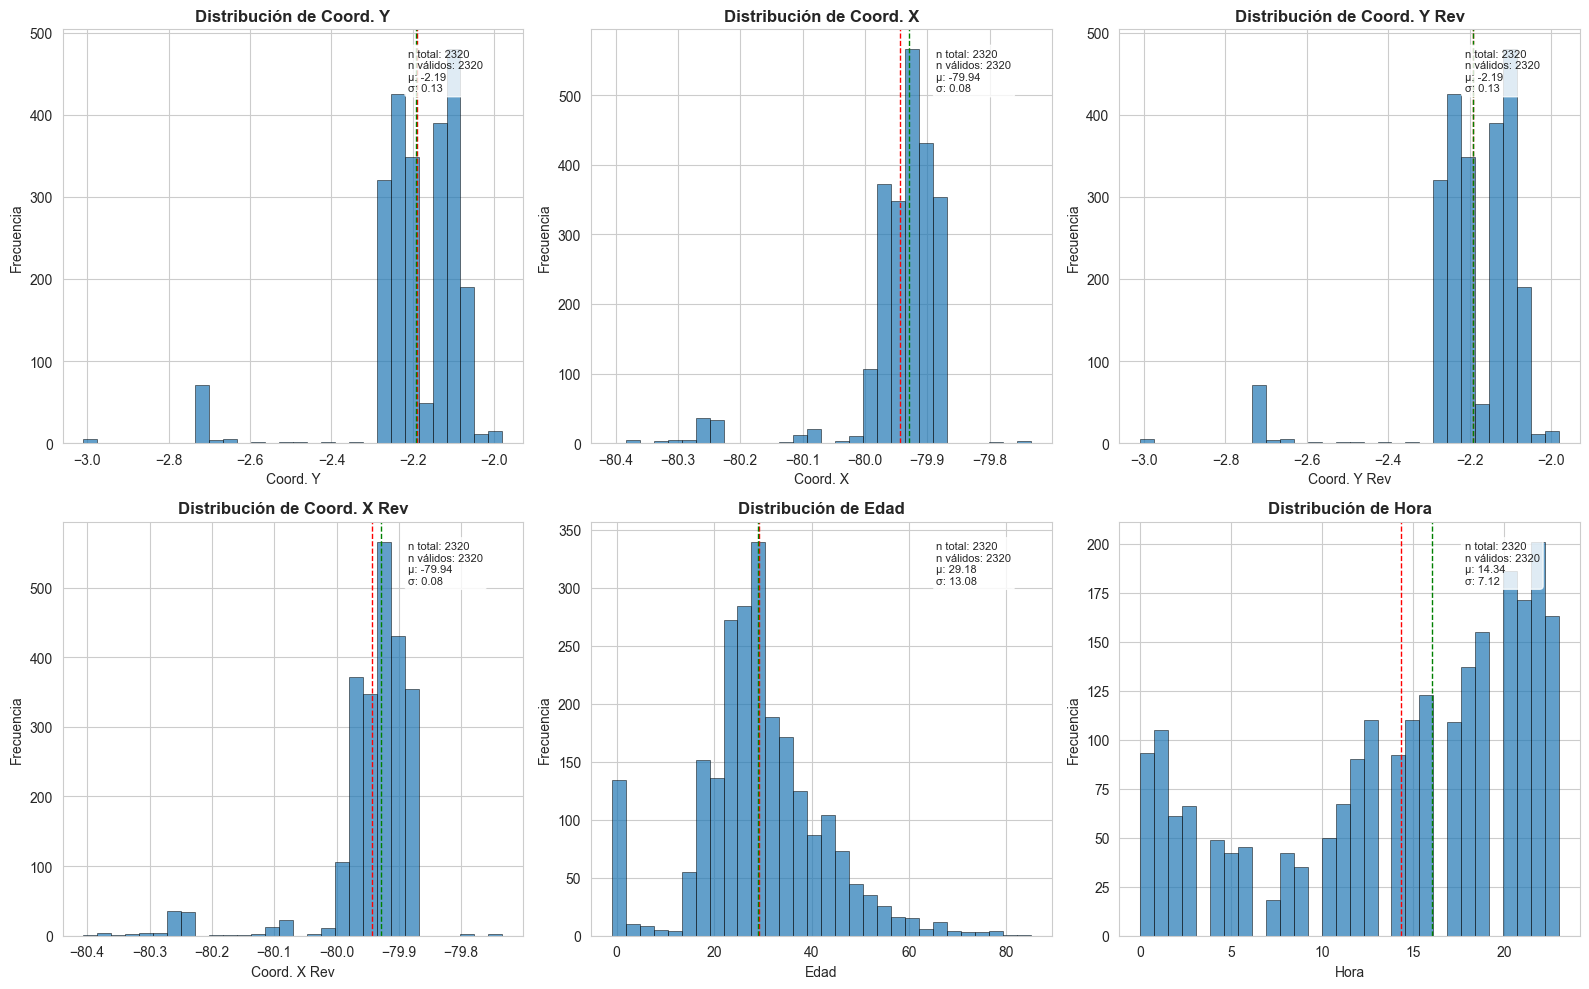

In [31]:
# Columnas numéricas específicas a visualizar
cols_to_plot = [
    'Coord. Y', 
    'Coord. X', 
    'Coord. Y Rev', 
    'Coord. X Rev', 
    'Edad', 
    'Hora'
]

num_to_plot = len(cols_to_plot)

plt.figure(figsize=(16, 10))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, (num_to_plot + 1) // 2, i)
    
    # Usar la columna completa (incluye NaN)
    data_col = data[col]
    
    # Histograma (NaN se ignoran automáticamente)
    plt.hist(
        data_col,
        bins=30,
        alpha=0.7,
        edgecolor="black",
        linewidth=0.5
    )
    
    plt.title(f'Distribución de {col}', fontweight='bold', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frecuencia", fontsize=10)
    
    # Estadísticos (pandas ignora NaN por defecto)
    mean_val = data_col.mean()
    median_val = data_col.median()
    std_val = data_col.std()
    
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label='Media')
    plt.axvline(median_val, color='green', linestyle='--', linewidth=1, label='Mediana')
    
    # Información estadística
    stats_text = (
        f'n total: {len(data_col)}\n'
        f'n válidos: {data_col.notna().sum()}\n'
        f'μ: {mean_val:.2f}\n'
        f'σ: {std_val:.2f}'
    )
    
    plt.text(
        0.75, 0.85,
        stats_text,
        transform=plt.gca().transAxes,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
        fontsize=8
    )

plt.tight_layout()
plt.show()


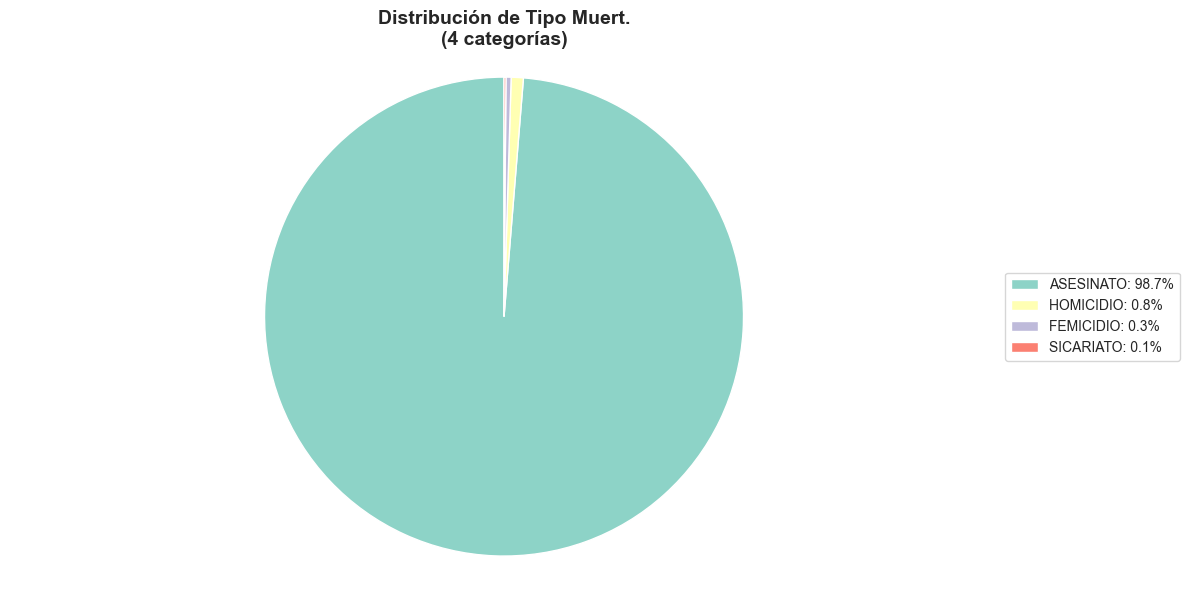

Gráfico generado para 'Tipo Muert.' (4 categorías)


'Zona' tiene una sola categoría. No se grafica.
value_counts():
Zona
ZONA 8    2320
Name: count, dtype: int64
--------------------------------------------------

'Subzona' tiene una sola categoría. No se grafica.
value_counts():
Subzona
D.M. GUAYAQUIL    2320
Name: count, dtype: int64
--------------------------------------------------


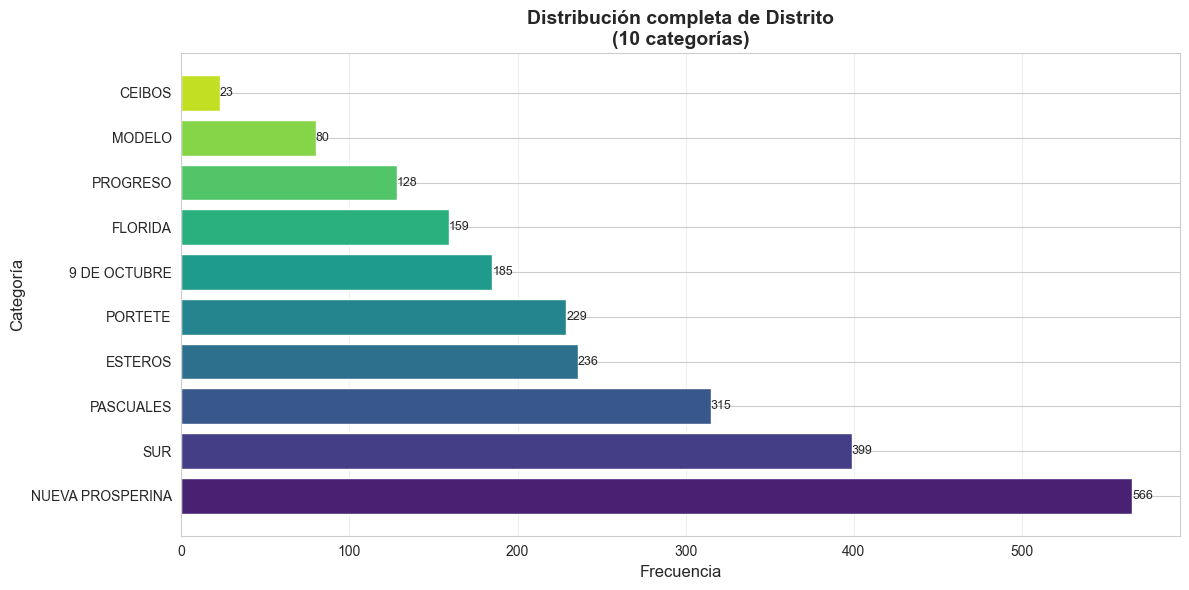

Gráfico generado para 'Distrito' (10 categorías)



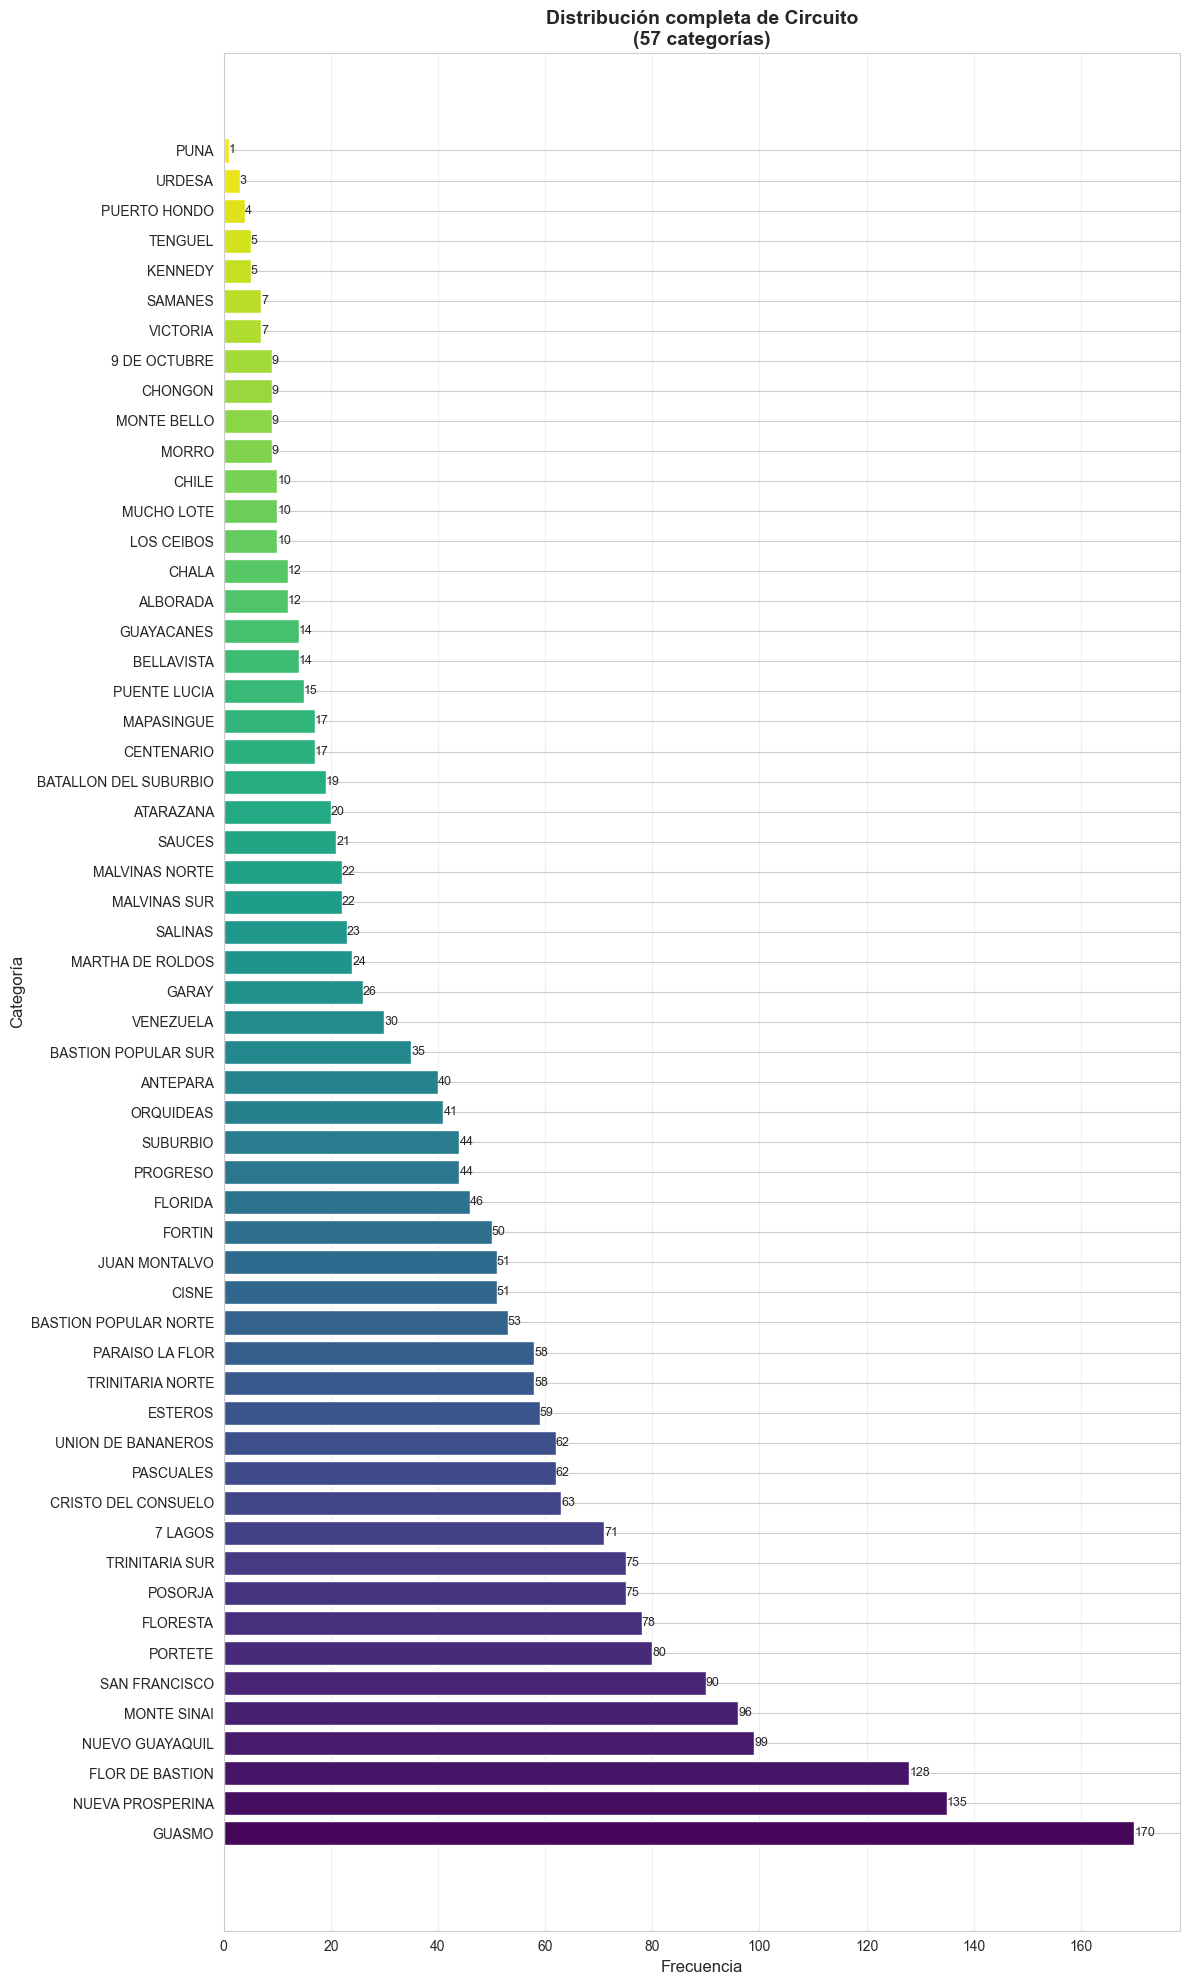

Gráfico generado para 'Circuito' (57 categorías)



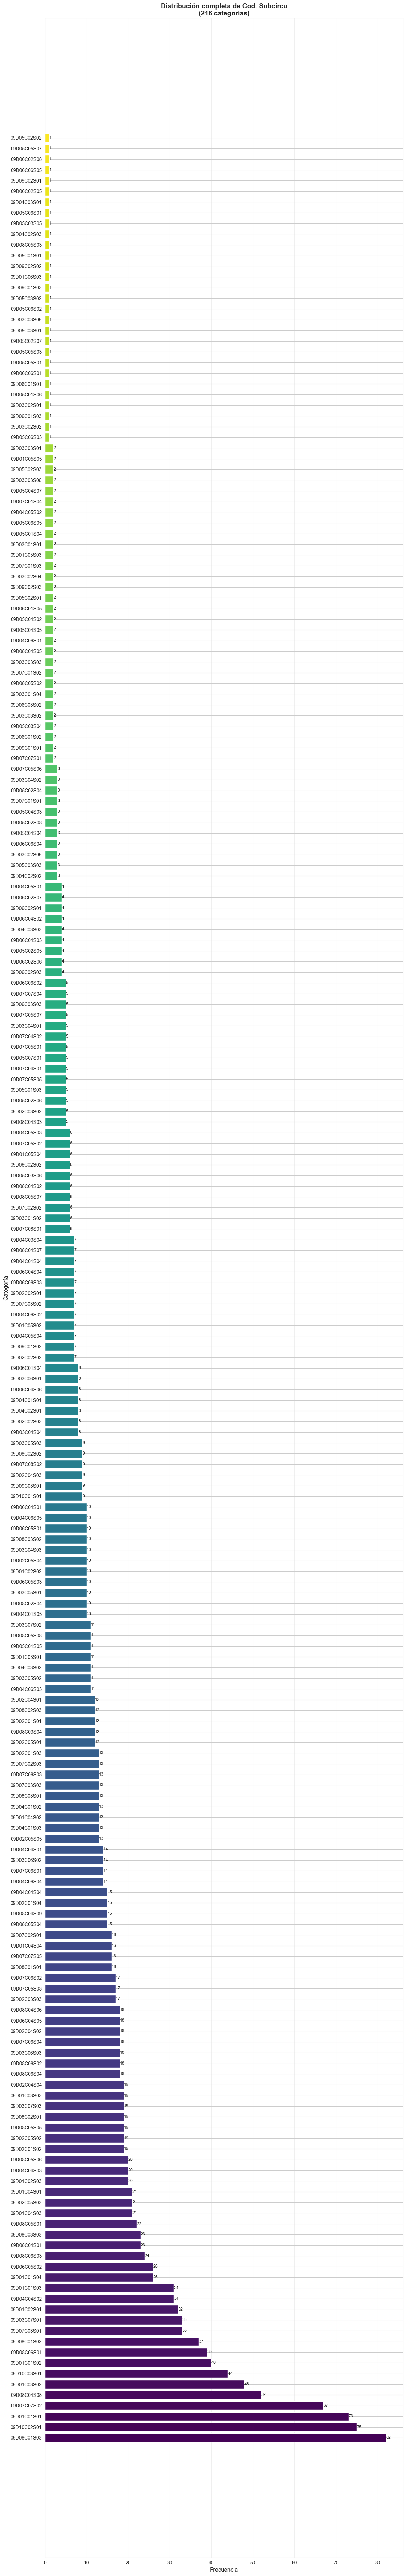

Gráfico generado para 'Cod. Subcircu' (216 categorías)



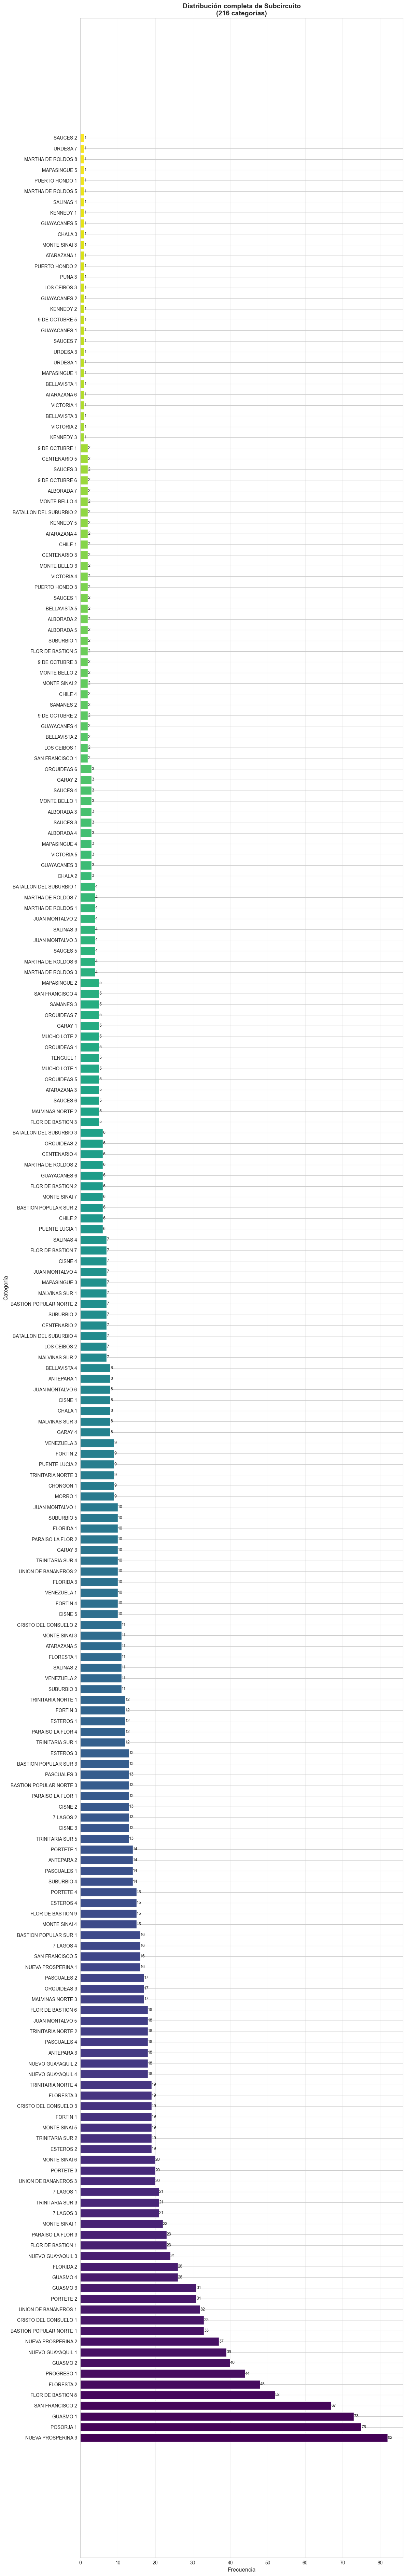

Gráfico generado para 'Subcircuito' (216 categorías)


'Provincia' tiene una sola categoría. No se grafica.
value_counts():
Provincia
GUAYAS    2320
Name: count, dtype: int64
--------------------------------------------------

'Cantón' tiene una sola categoría. No se grafica.
value_counts():
Cantón
GUAYAQUIL    2320
Name: count, dtype: int64
--------------------------------------------------


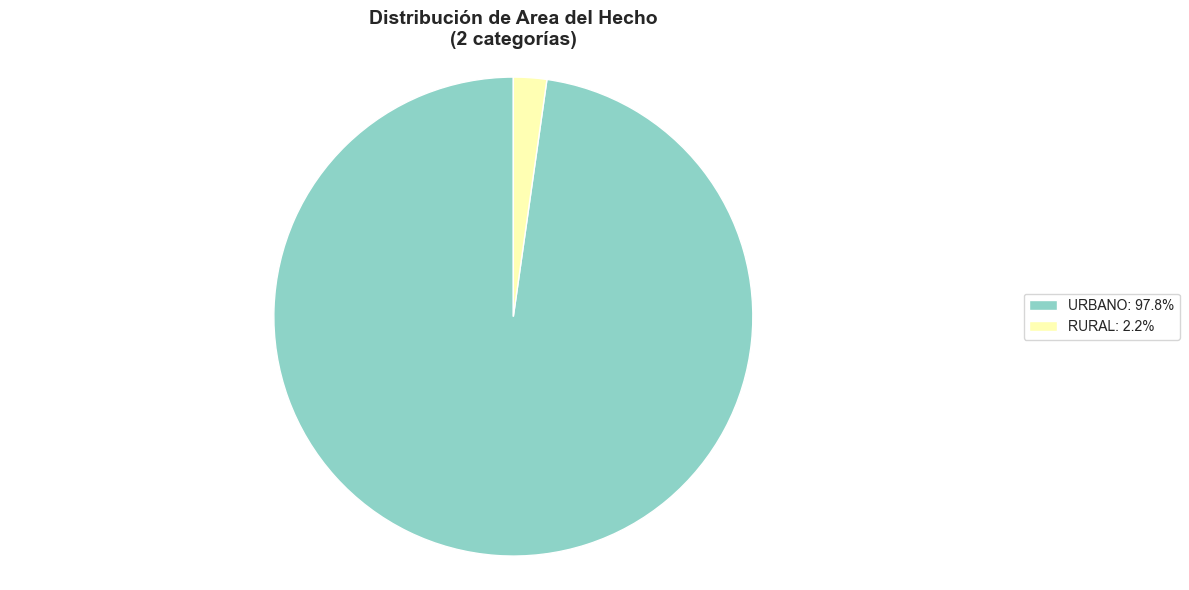

Gráfico generado para 'Area del Hecho' (2 categorías)



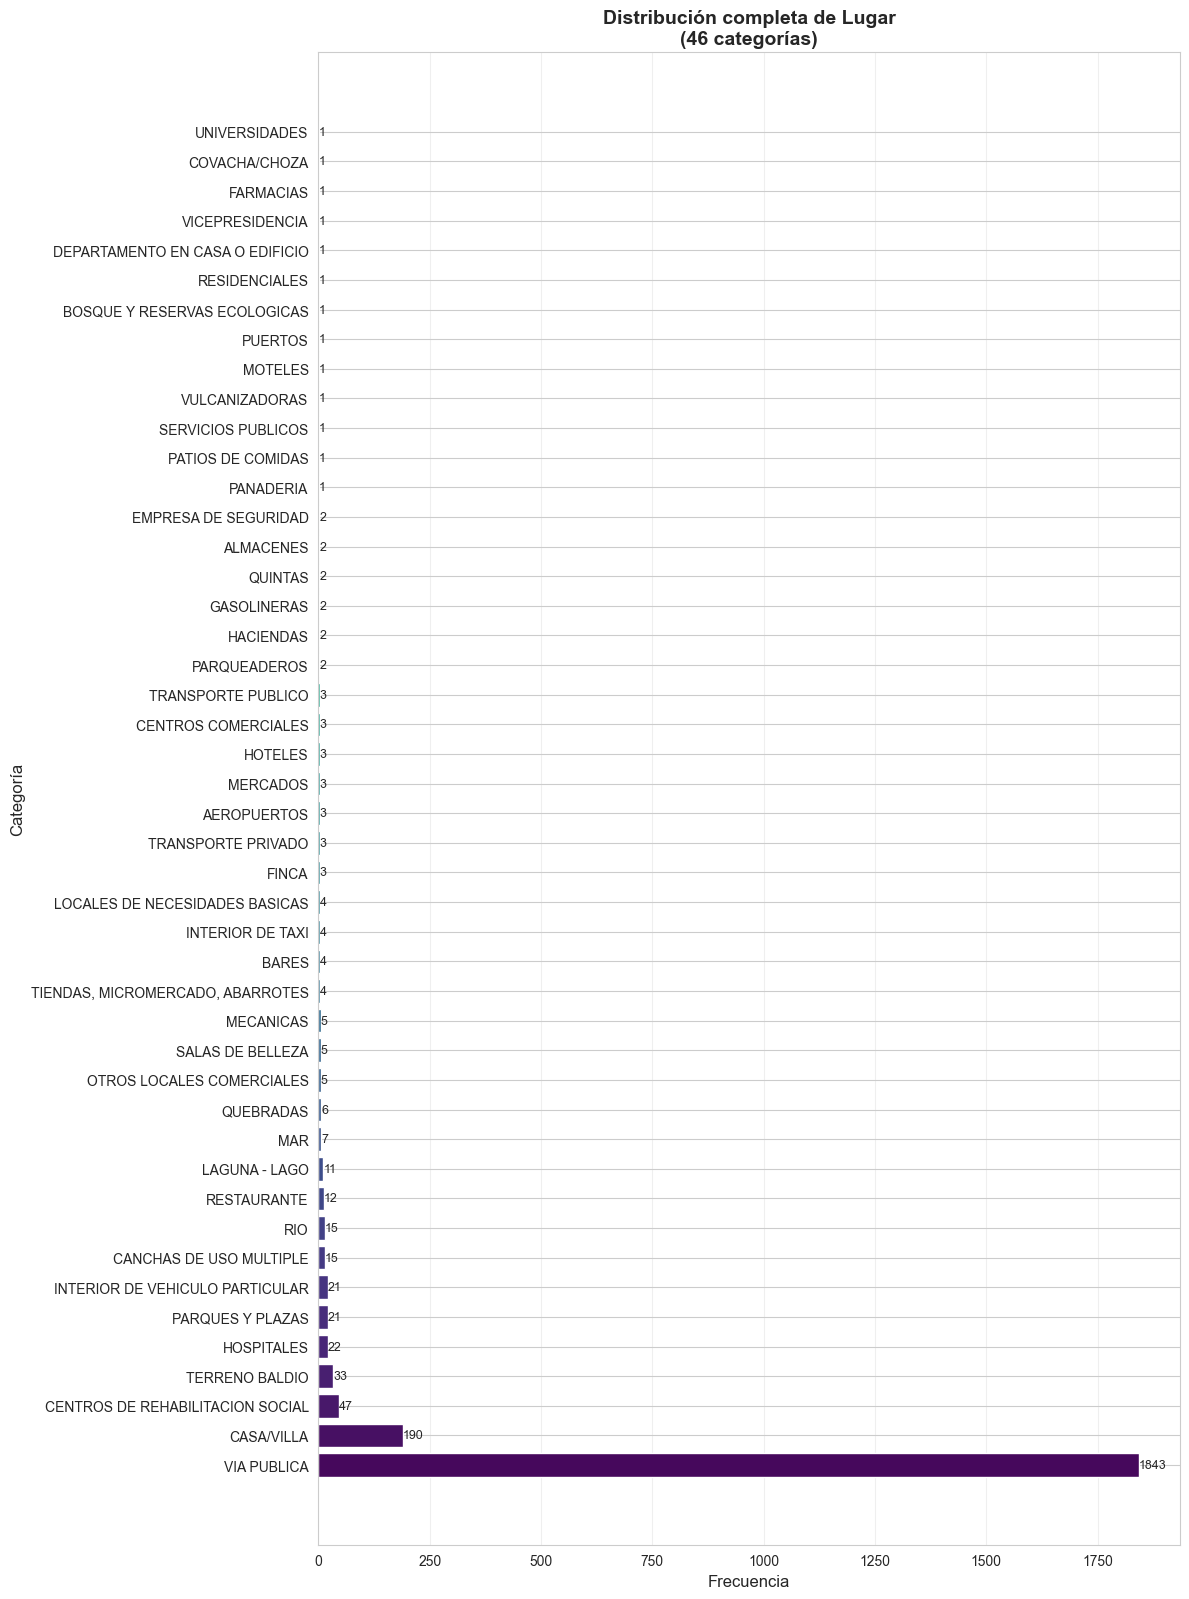

Gráfico generado para 'Lugar' (46 categorías)



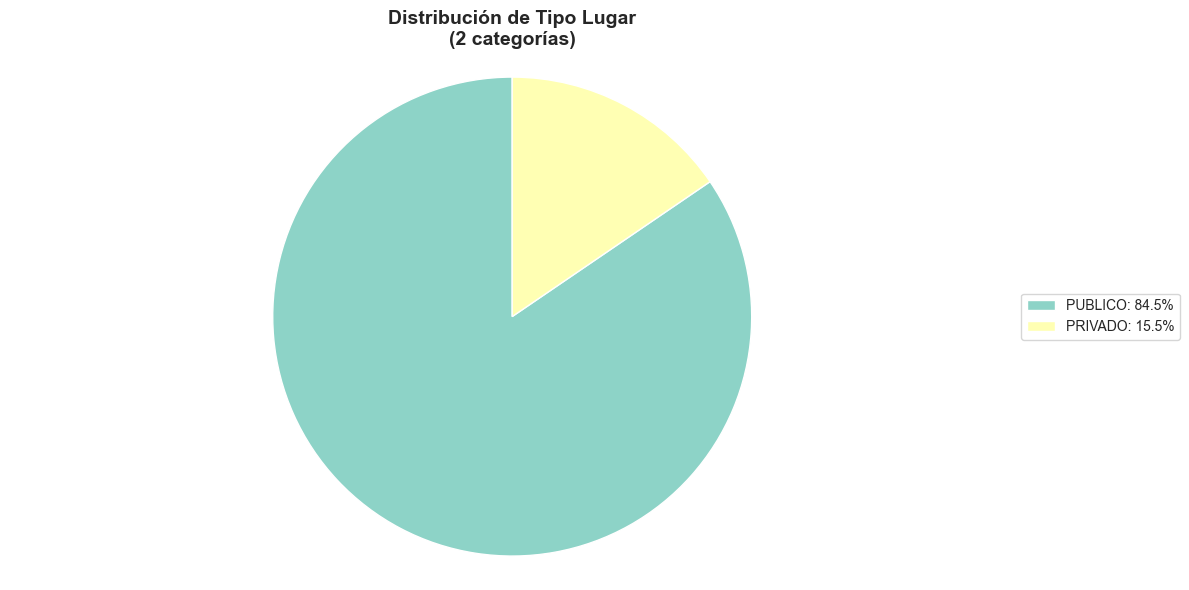

Gráfico generado para 'Tipo Lugar' (2 categorías)



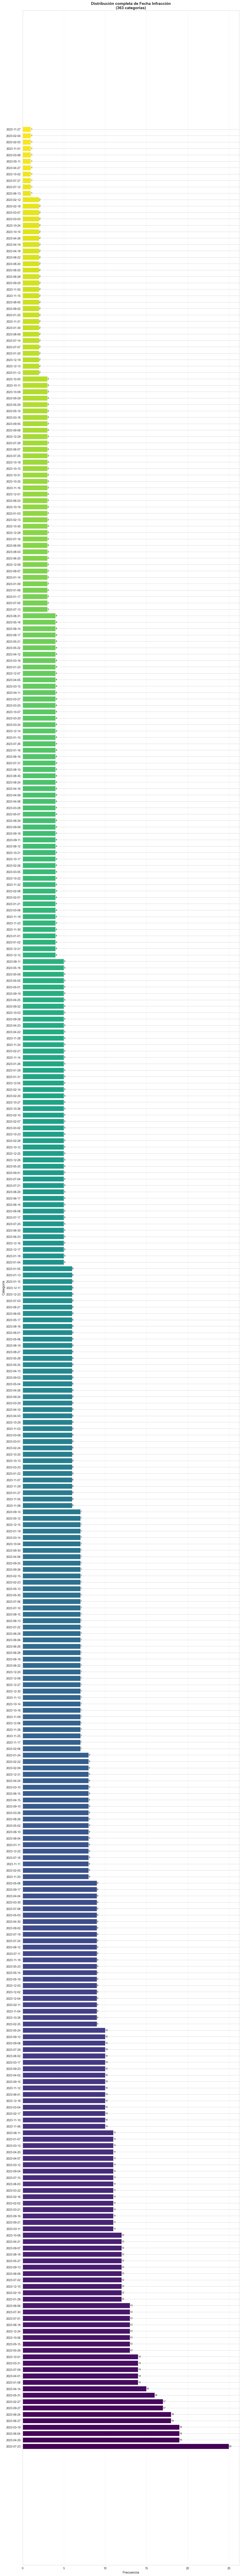

Gráfico generado para 'Fecha Infracción' (363 categorías)



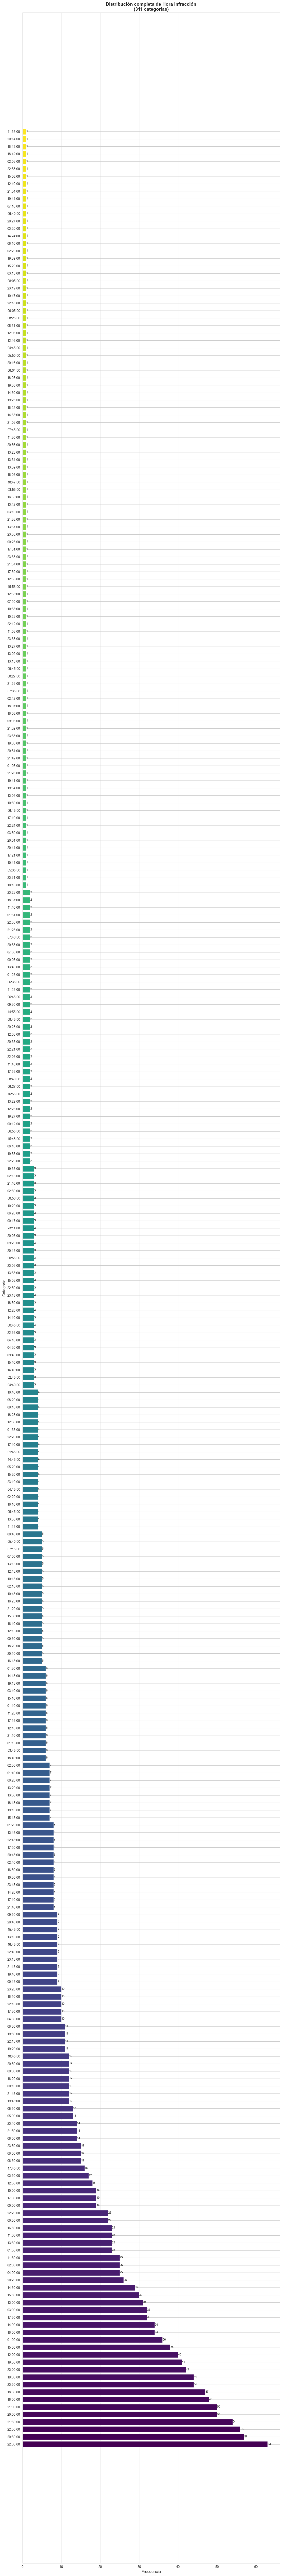

Gráfico generado para 'Hora Infracción' (311 categorías)



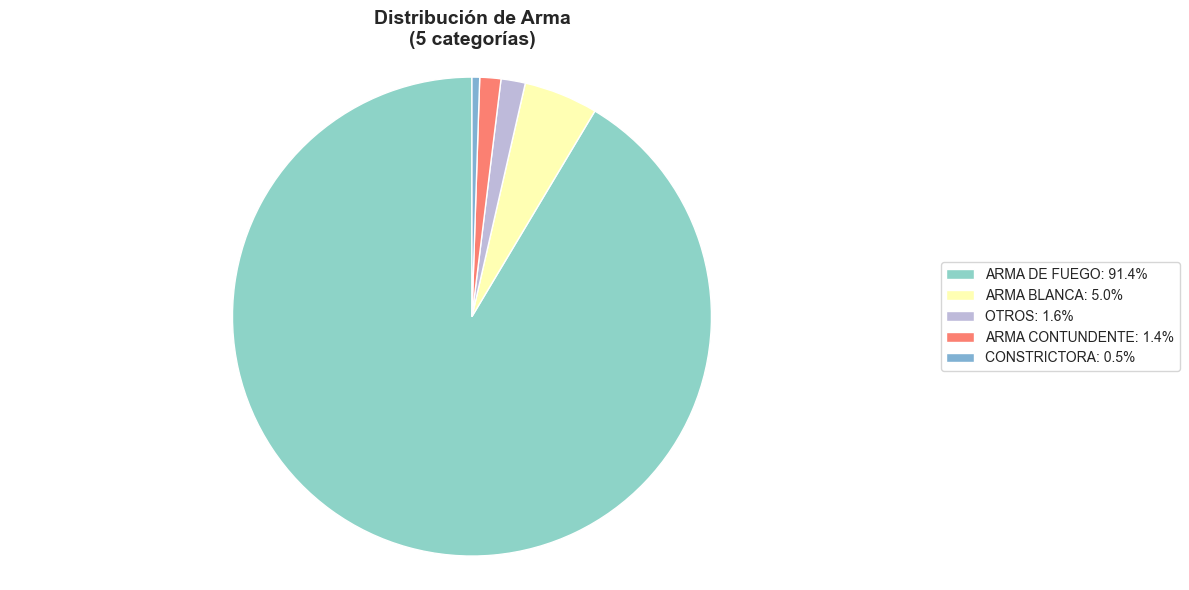

Gráfico generado para 'Arma' (5 categorías)



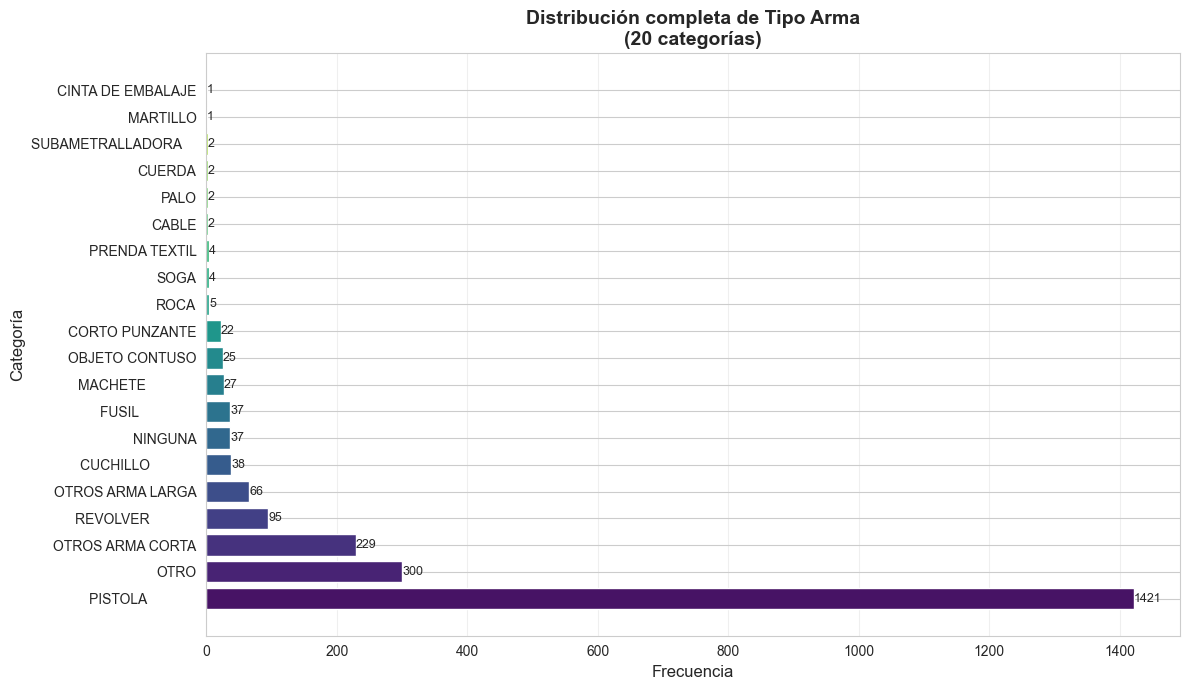

Gráfico generado para 'Tipo Arma' (20 categorías)



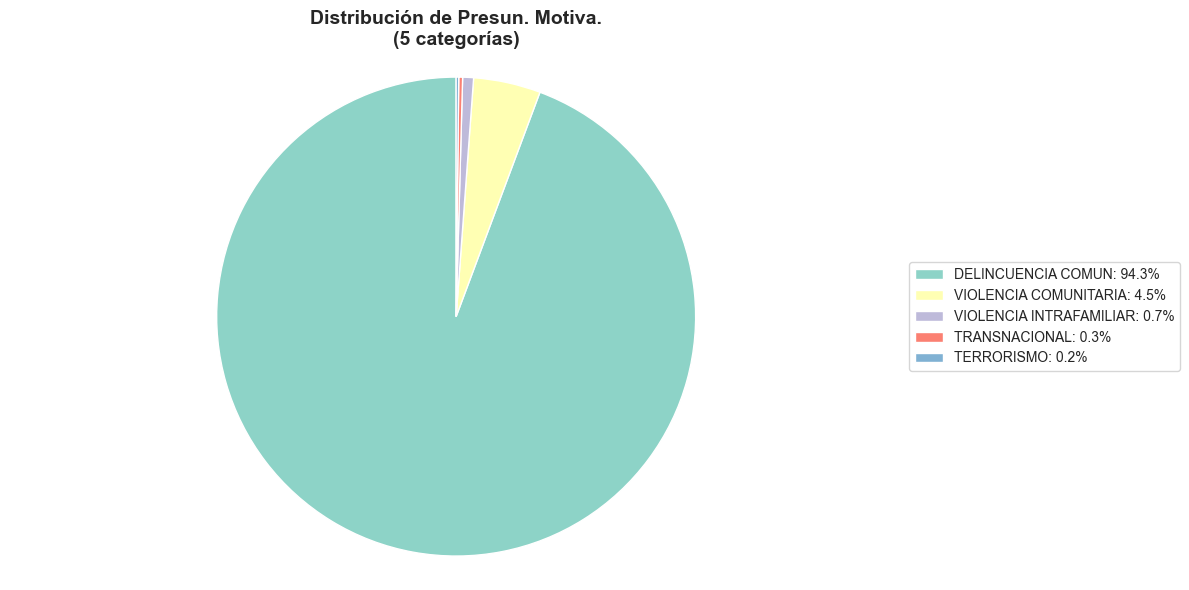

Gráfico generado para 'Presun. Motiva.' (5 categorías)



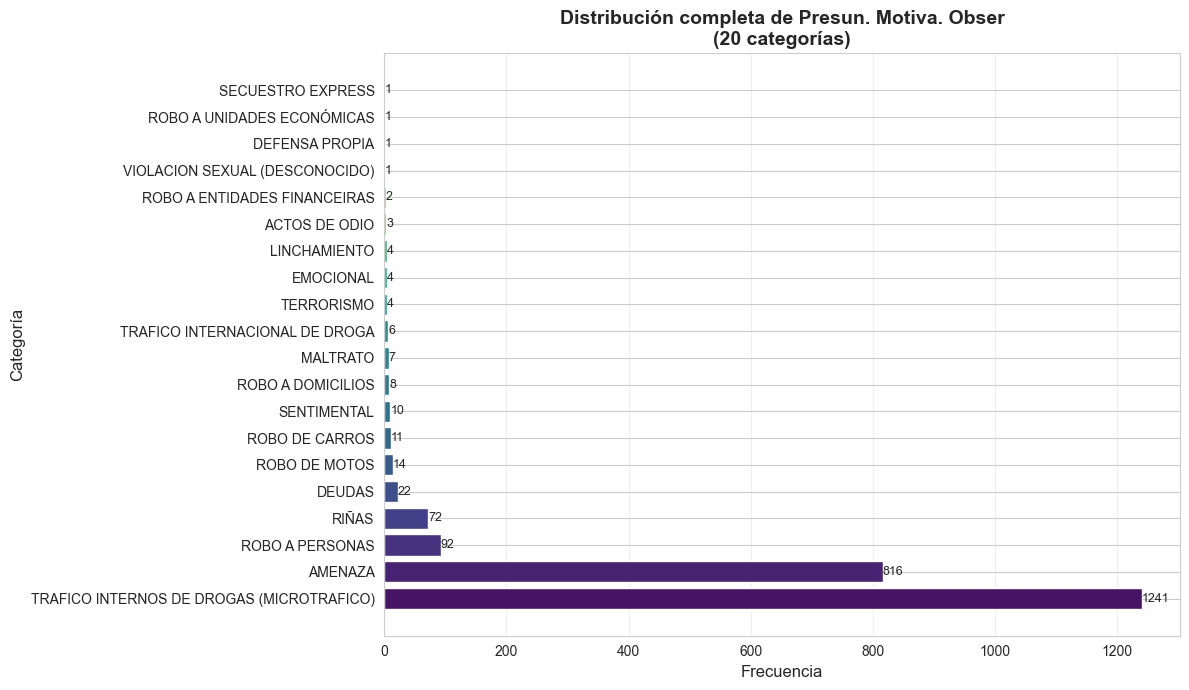

Gráfico generado para 'Presun. Motiva. Obser' (20 categorías)



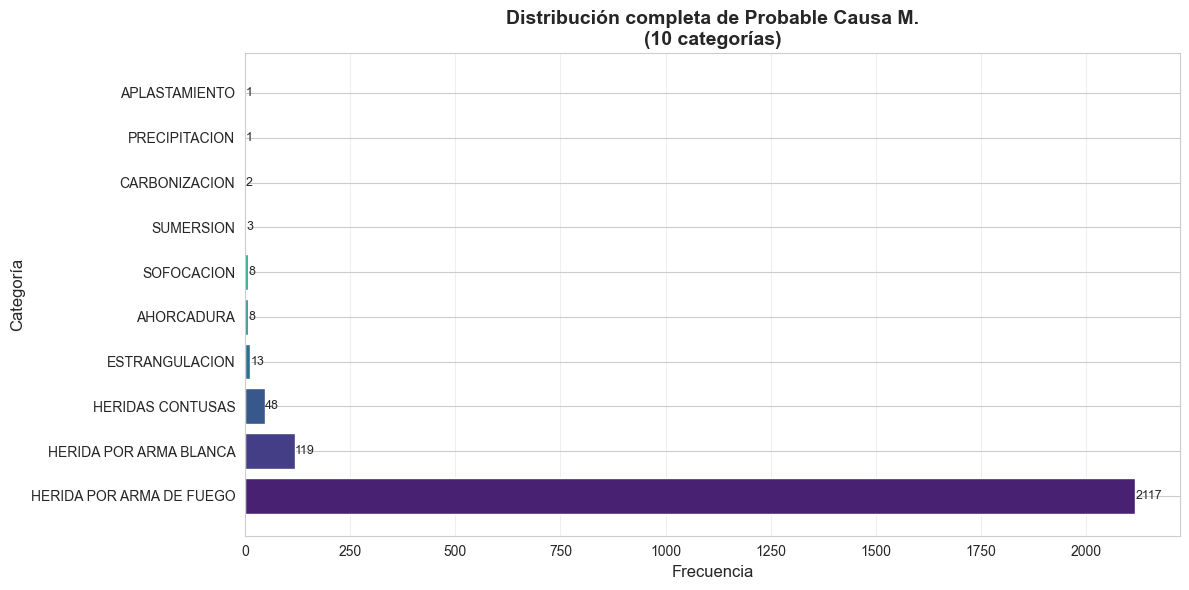

Gráfico generado para 'Probable Causa M.' (10 categorías)



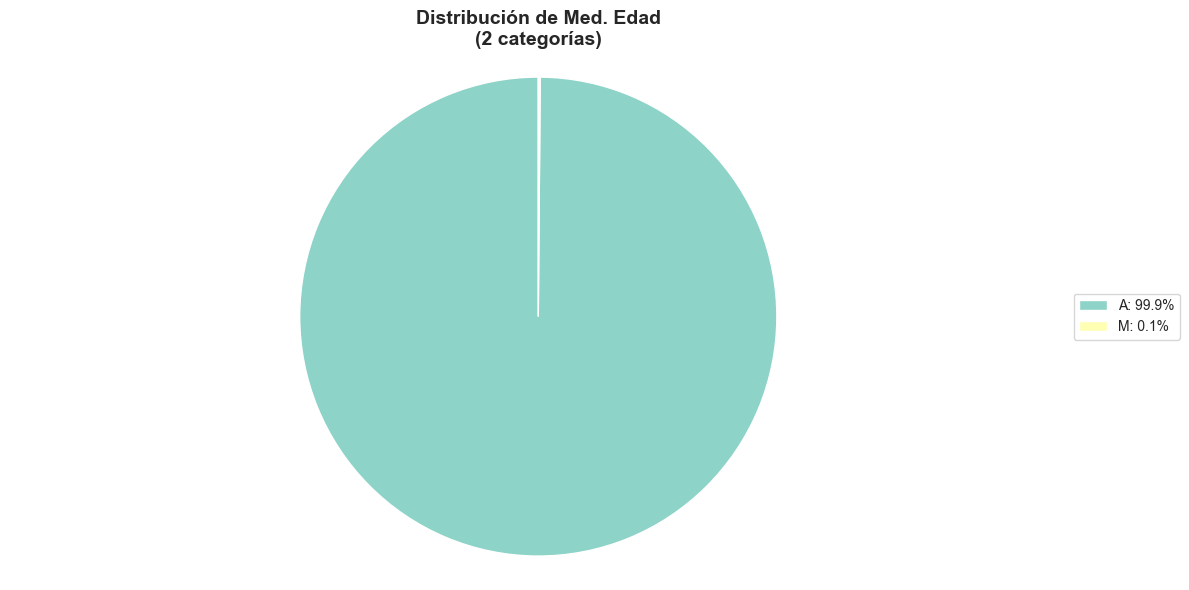

Gráfico generado para 'Med. Edad' (2 categorías)



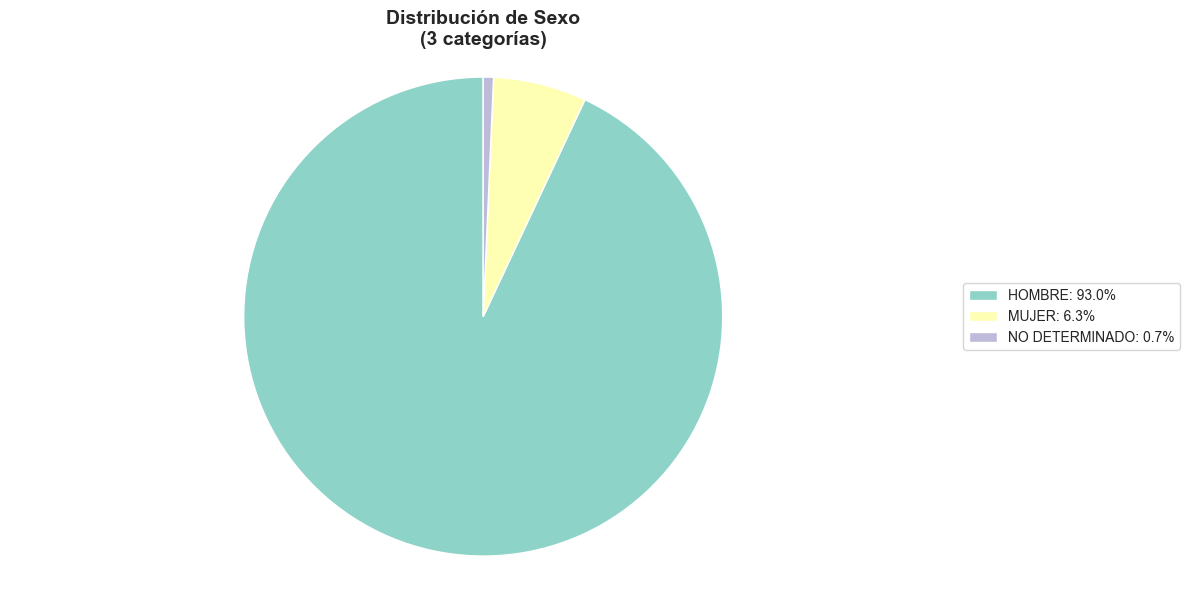

Gráfico generado para 'Sexo' (3 categorías)



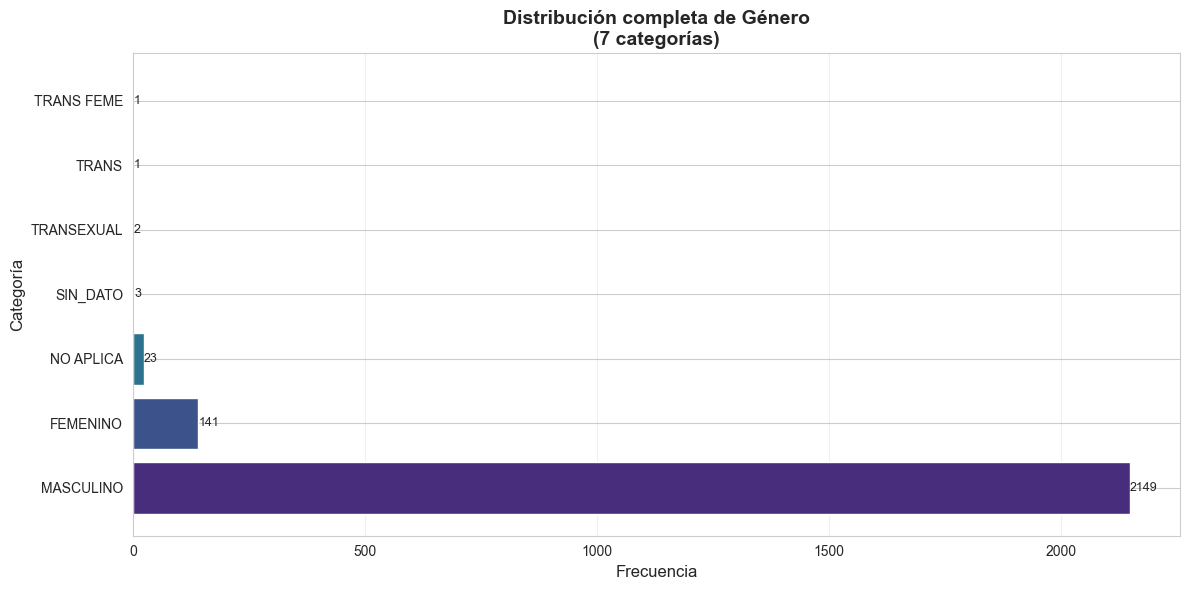

Gráfico generado para 'Género' (7 categorías)



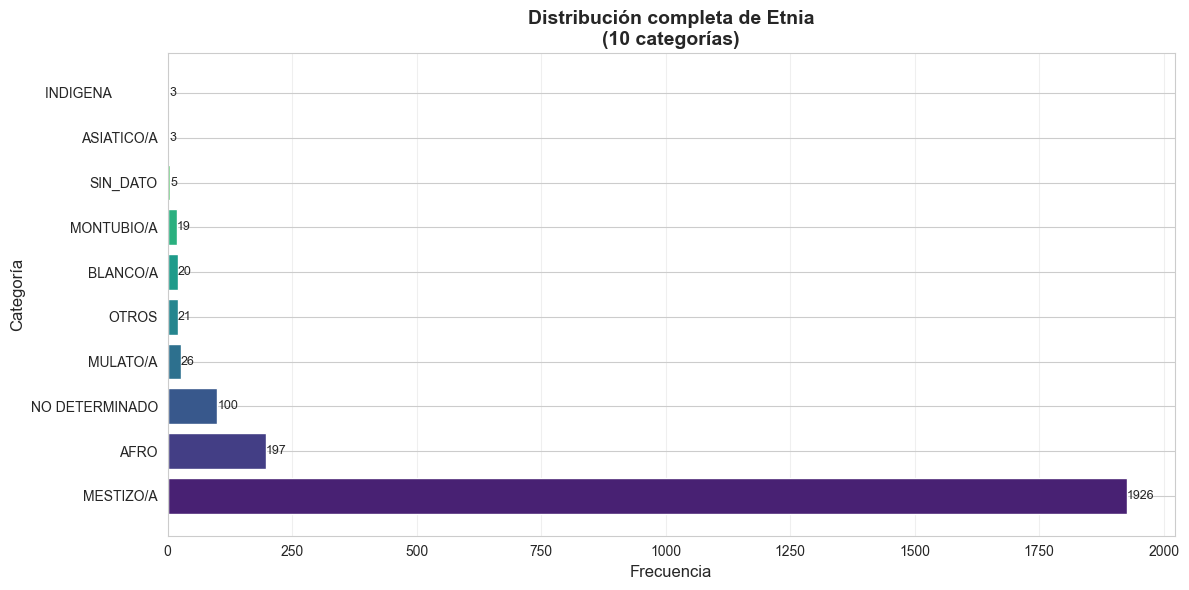

Gráfico generado para 'Etnia' (10 categorías)



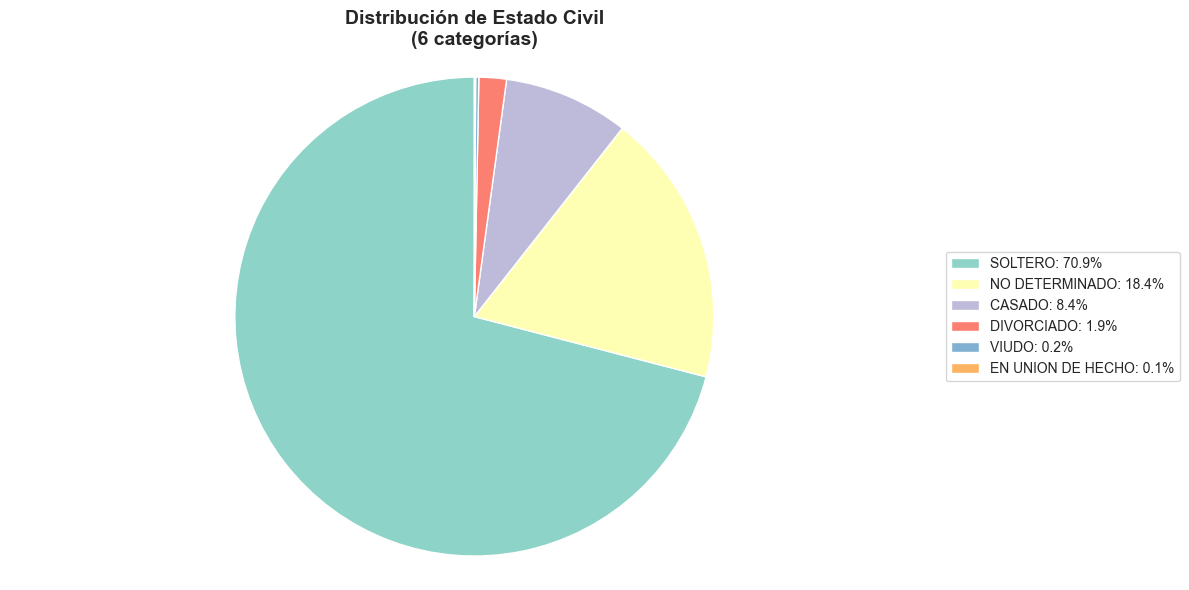

Gráfico generado para 'Estado Civil' (6 categorías)



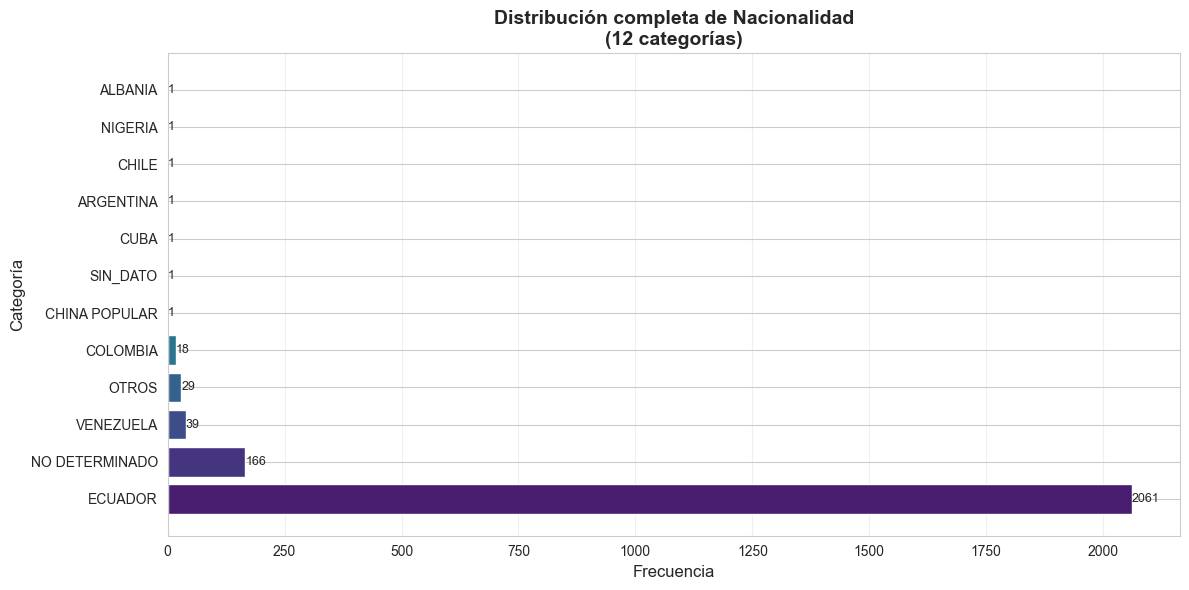

Gráfico generado para 'Nacionalidad' (12 categorías)



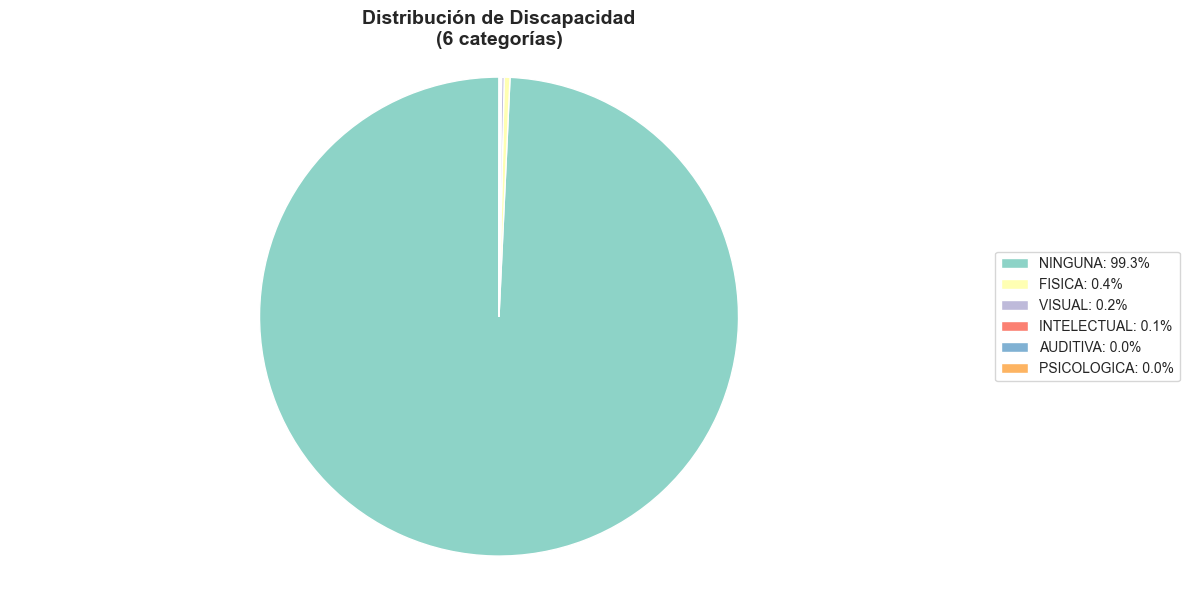

Gráfico generado para 'Discapacidad' (6 categorías)



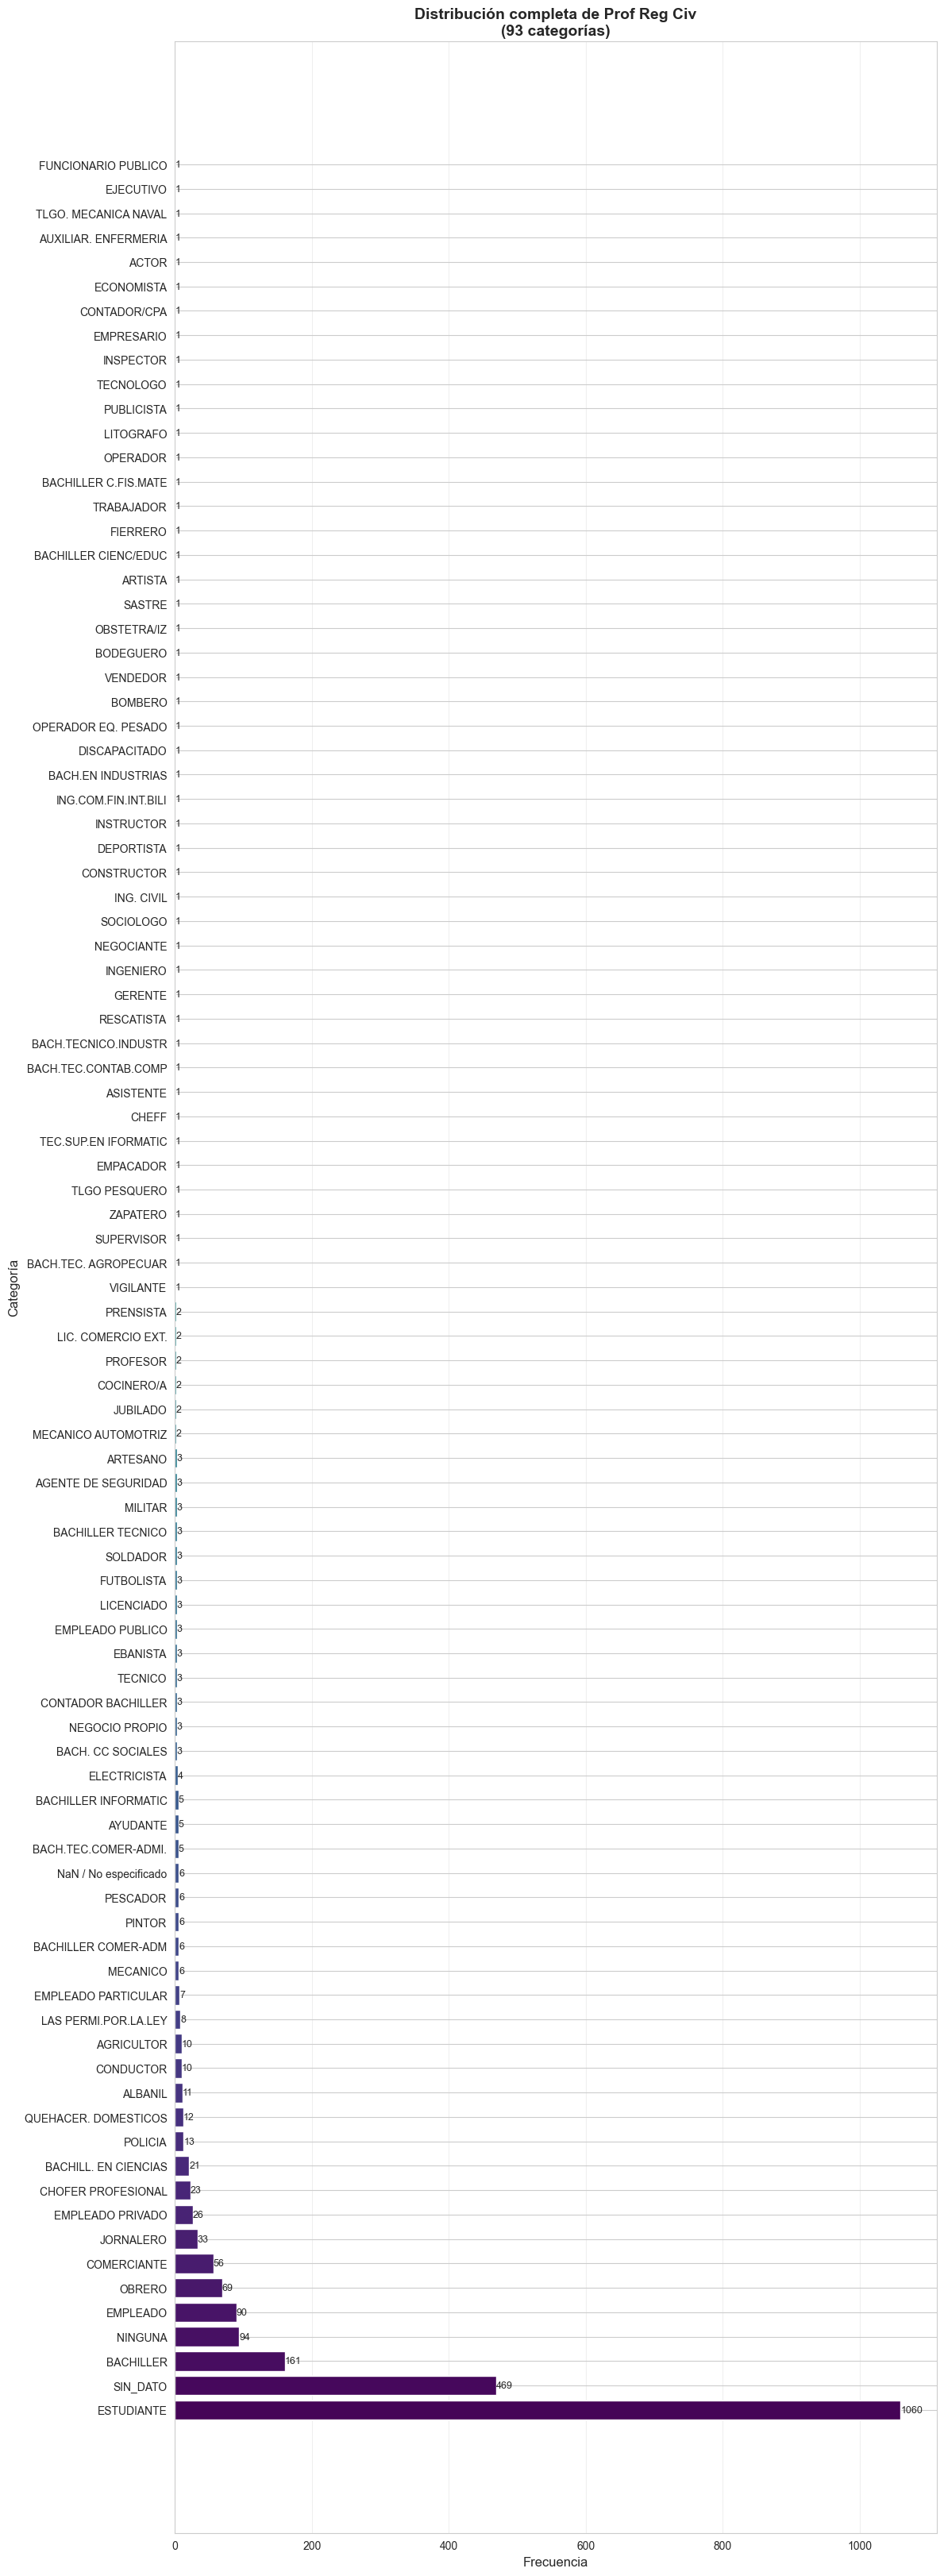

Gráfico generado para 'Prof Reg Civ' (93 categorías)



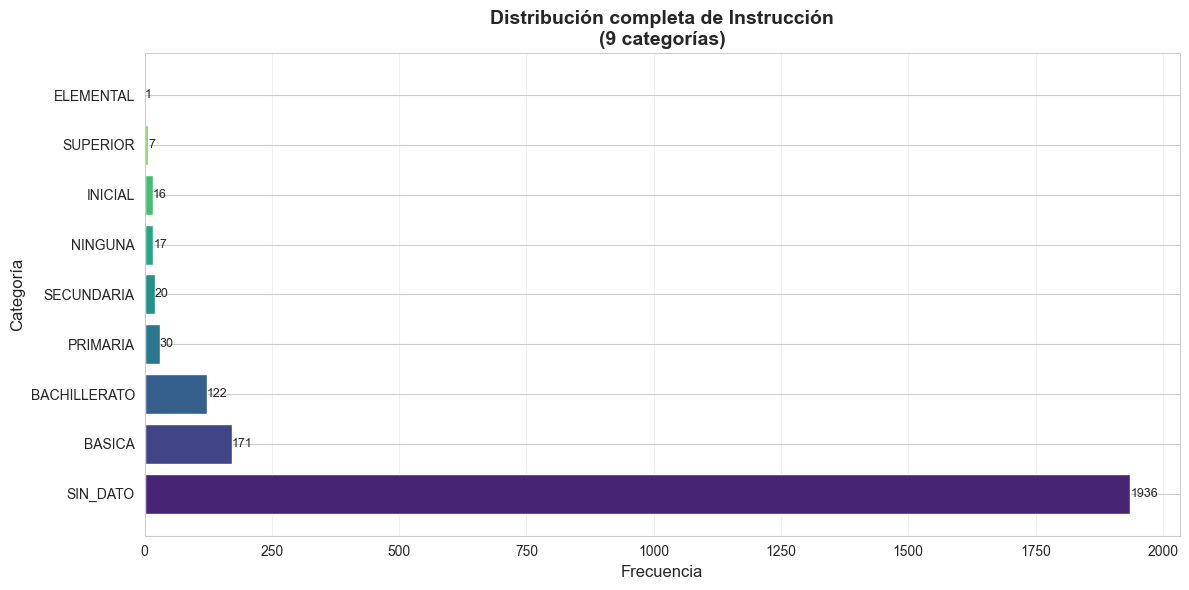

Gráfico generado para 'Instrucción' (9 categorías)



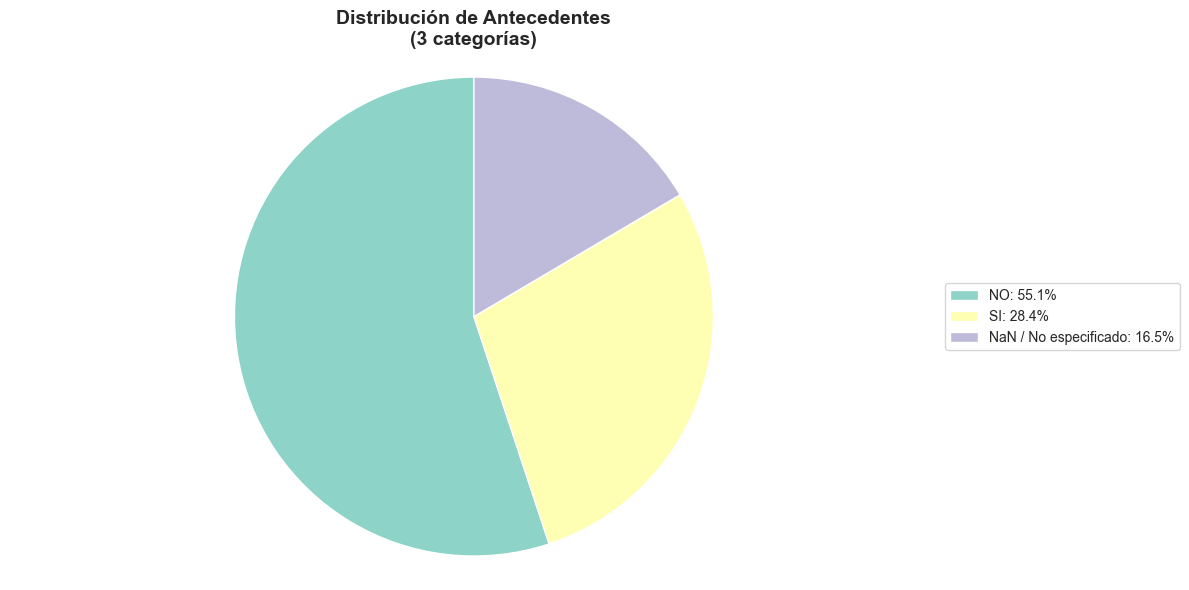

Gráfico generado para 'Antecedentes' (3 categorías)



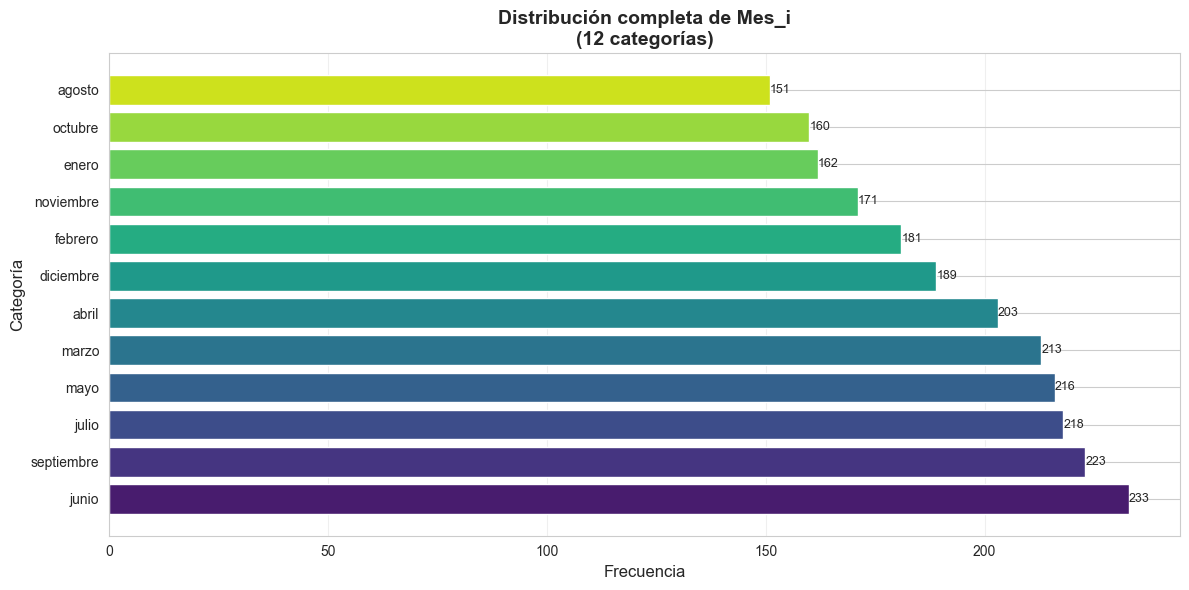

Gráfico generado para 'Mes_i' (12 categorías)



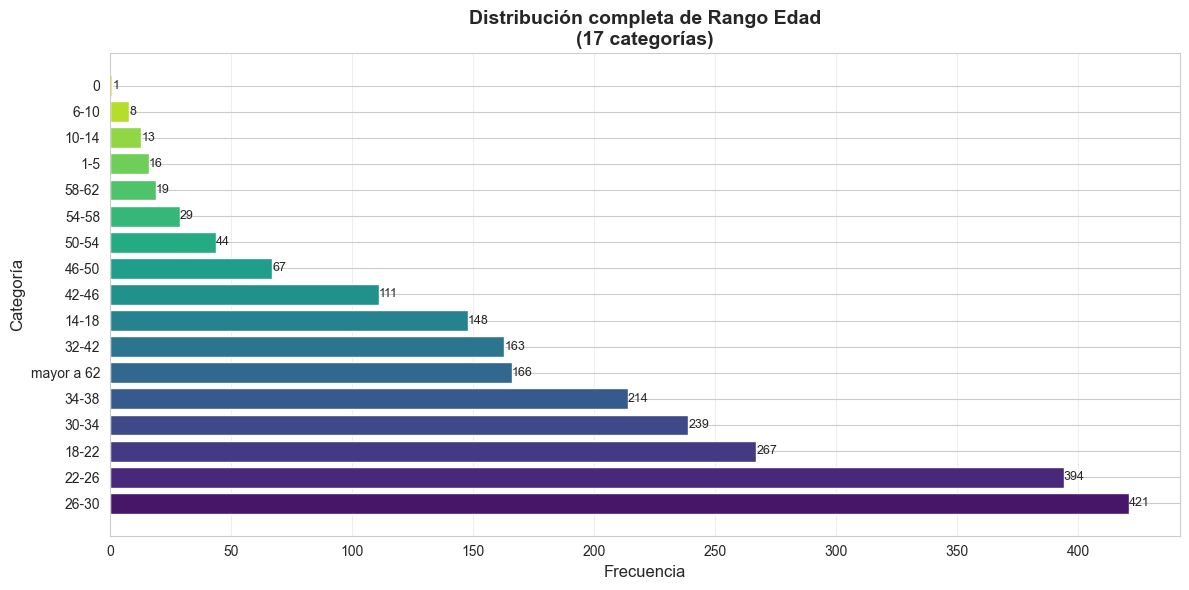

Gráfico generado para 'Rango Edad' (17 categorías)



In [32]:
def graficar_categoricas(df, categorical_cols):
    """
    Grafica variables categóricas mostrando TODAS las categorías,
    incluyendo NaN como categoría explícita.

    Regla adicional:
    - Si la variable tiene UNA sola categoría → no se grafica,
      se muestra value_counts().
    """

    sns.set_style("whitegrid")

    for columna in categorical_cols:
        if columna not in df.columns:
            print(f"Advertencia: Columna '{columna}' no encontrada en el DataFrame")
            continue

        # Conteo SIN eliminar NaN
        conteo = (
            df[columna]
            .fillna('NaN / No especificado')
            .value_counts(dropna=False)
        )

        if conteo.sum() == 0:
            print(f"Advertencia: Columna '{columna}' no tiene observaciones")
            continue

        # 🔹 Caso: una sola categoría
        if len(conteo) == 1:
            print(f"\n'{columna}' tiene una sola categoría. No se grafica.")
            print("value_counts():")
            print(conteo)
            print("-" * 50)
            continue

        # Tamaño dinámico
        fig_height = max(6, len(conteo) * 0.35)
        plt.figure(figsize=(12, fig_height))

        if len(conteo) < 7:
            # 🔹 Gráfico de pastel
            colors = sns.color_palette("Set3", len(conteo))
            wedges, _ = plt.pie(
                conteo.values,
                startangle=90,
                colors=colors
            )

            labels_with_pct = [
                f'{label}: {valor / conteo.sum() * 100:.1f}%'
                for label, valor in zip(conteo.index, conteo.values)
            ]

            plt.legend(
                wedges,
                labels_with_pct,
                loc="center left",
                bbox_to_anchor=(1, 0, 0.5, 1),
                fontsize=10
            )

            plt.title(
                f'Distribución de {columna}\n({len(conteo)} categorías)',
                fontsize=14,
                fontweight='bold'
            )
            plt.axis('equal')

        else:
            # Gráfico de barras (todas las categorías)
            bars = plt.barh(
                conteo.index.astype(str),
                conteo.values,
                color=sns.color_palette("viridis", len(conteo))
            )

            plt.xlabel('Frecuencia', fontsize=12)
            plt.ylabel('Categoría', fontsize=12)
            plt.title(
                f'Distribución completa de {columna}\n({len(conteo)} categorías)',
                fontsize=14,
                fontweight='bold'
            )

            # Etiquetas
            for bar in bars:
                width = bar.get_width()
                plt.text(
                    width,
                    bar.get_y() + bar.get_height() / 2,
                    f'{int(width)}',
                    va='center',
                    ha='left',
                    fontsize=9
                )

            plt.grid(axis='x', alpha=0.3)

        plt.tight_layout()
        plt.show()
        print(f"Gráfico generado para '{columna}' ({len(conteo)} categorías)\n")

graficar_categoricas(data, categorical_cols)


## **Tratamiento de datos faltantes**

In [33]:
# Copia de la data
data_dropna = data.copy()

# Variable 'Género' definir valores faltantes a "SIN_DATO"
data_dropna['Género'] = data_dropna['Género'].replace(
    ['SIN_DATO', 'NO APLICA'],
    np.nan
)

data_dropna['Género'].value_counts(dropna=False)

Género
MASCULINO     2149
FEMENINO       141
NaN             26
TRANSEXUAL       2
TRANS            1
TRANS FEME       1
Name: count, dtype: int64

In [34]:
data_dropna['Etnia'] = data_dropna['Etnia'].replace(
    ['SIN_DATO', 'NO DETERMINADO'],
    np.nan
)

data_dropna['Etnia'].value_counts(dropna=False)

Etnia
MESTIZO/A               1926
AFRO                     197
NaN                      105
MULATO/A                  26
OTROS                     21
BLANCO/A                  20
MONTUBIO/A                19
ASIATICO/A                 3
INDIGENA                   3
Name: count, dtype: int64

In [35]:
data_dropna['Estado Civil'] = data_dropna['Estado Civil'].replace(
    ['NO DETERMINADO'],
    np.nan
)

data_dropna['Estado Civil'].value_counts(dropna=False)

Estado Civil
SOLTERO              1646
NaN                   428
CASADO                196
DIVORCIADO             43
VIUDO                   5
EN UNION DE HECHO       2
Name: count, dtype: int64

In [36]:
data_dropna['Nacionalidad'] = data_dropna['Nacionalidad'].replace(
    ['SIN_DATO', 'NO DETERMINADO'],
    np.nan
)

data_dropna['Nacionalidad'].value_counts(dropna=False)

Nacionalidad
ECUADOR          2061
NaN               167
VENEZUELA          39
OTROS              29
COLOMBIA           18
CHINA POPULAR       1
CUBA                1
ARGENTINA           1
CHILE               1
NIGERIA             1
ALBANIA             1
Name: count, dtype: int64

In [37]:
data_dropna['Prof Reg Civ'] = data_dropna['Prof Reg Civ'].replace(
    ['SIN_DATO', 'NaN / No especificado'],
    np.nan
)

data_dropna['Prof Reg Civ'].value_counts(dropna=False)

Prof Reg Civ
ESTUDIANTE              1060
NaN                      475
BACHILLER                161
NINGUNA                   94
EMPLEADO                  90
                        ... 
ACTOR                      1
AUXILIAR. ENFERMERIA       1
TLGO. MECANICA NAVAL       1
EJECUTIVO                  1
FUNCIONARIO PUBLICO        1
Name: count, Length: 92, dtype: int64

In [38]:
data_dropna['Instrucción'] = data_dropna['Instrucción'].replace(
    ['SIN_DATO'],
    np.nan
)

data_dropna['Instrucción'].value_counts(dropna=False)

Instrucción
NaN             1936
BASICA           171
BACHILLERATO     122
PRIMARIA          30
SECUNDARIA        20
NINGUNA           17
INICIAL           16
SUPERIOR           7
ELEMENTAL          1
Name: count, dtype: int64

In [39]:
data_dropna['Antecedentes'] = data_dropna['Antecedentes'].replace(
    ['NaN / No especificado'],
    np.nan
)

data_dropna['Antecedentes'].value_counts(dropna=False)

Antecedentes
NO     1278
SI      659
NaN     383
Name: count, dtype: int64

In [40]:
# Porcentaje de valores faltantes por columna
missing_percent = data_dropna.isna().mean() * 100
missing_table = pd.DataFrame({
    "porcentaje_na": missing_percent
}).sort_values(by="porcentaje_na", ascending=False)

print("Porcentaje de valores faltantes por columna:")
display(missing_table)

Porcentaje de valores faltantes por columna:


porcentaje_na
Instrucción                83.448276
Prof Reg Civ               20.474138
Estado Civil               18.448276
Antecedentes               16.508621
Nacionalidad                7.198276
Etnia                       4.525862
Género                      1.120690
Tipo Muert.                 0.000000
Provincia                   0.000000
Subcircuito                 0.000000
Cod. Subcircu               0.000000
Circuito                    0.000000
Distrito                    0.000000
Subzona                     0.000000
Zona                        0.000000
código de provincia         0.000000
Lugar                       0.000000
Cantón                      0.000000
código de cantón            0.000000
Coord. Y                    0.000000
Coord. X                    0.000000
Coord. Y Rev                0.000000
Coord. X Rev                0.000000
Area del Hecho              0.000000
Presun. Motiva. Obser       0.000000
Presun. Motiva.             0.000000
Tipo Arma                   0.000000
Arma                        0.000000
Hora Infracción             0.000000
Fecha Infracción            0.000000
Tipo Lugar                  0.000000
Sexo                        0.000000
Probable Causa M.           0.000000
Edad                        0.000000
Med. Edad                   0.000000
Discapacidad                0.000000
Anio_i                      0.000000
Mes_i                       0.000000
Hora                        0.000000
Rango Edad                  0.000000

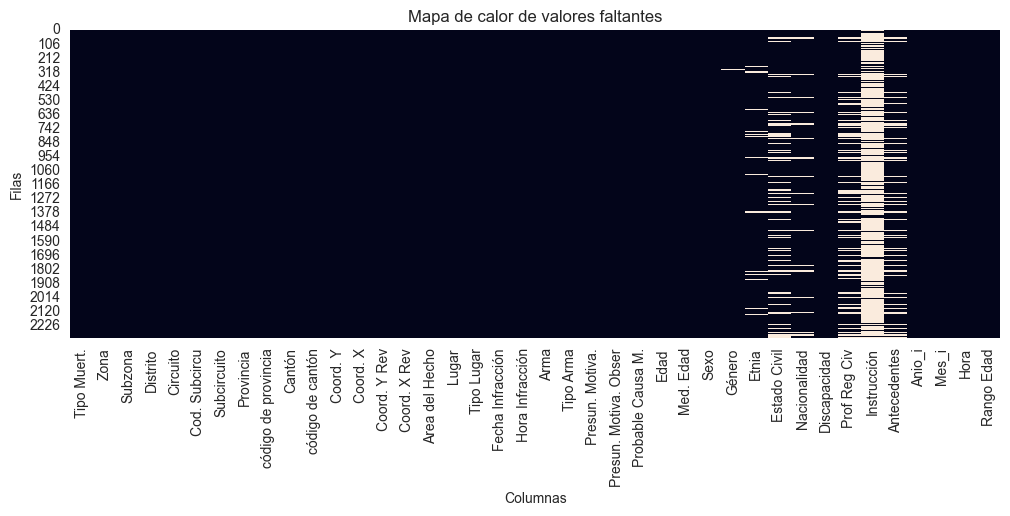

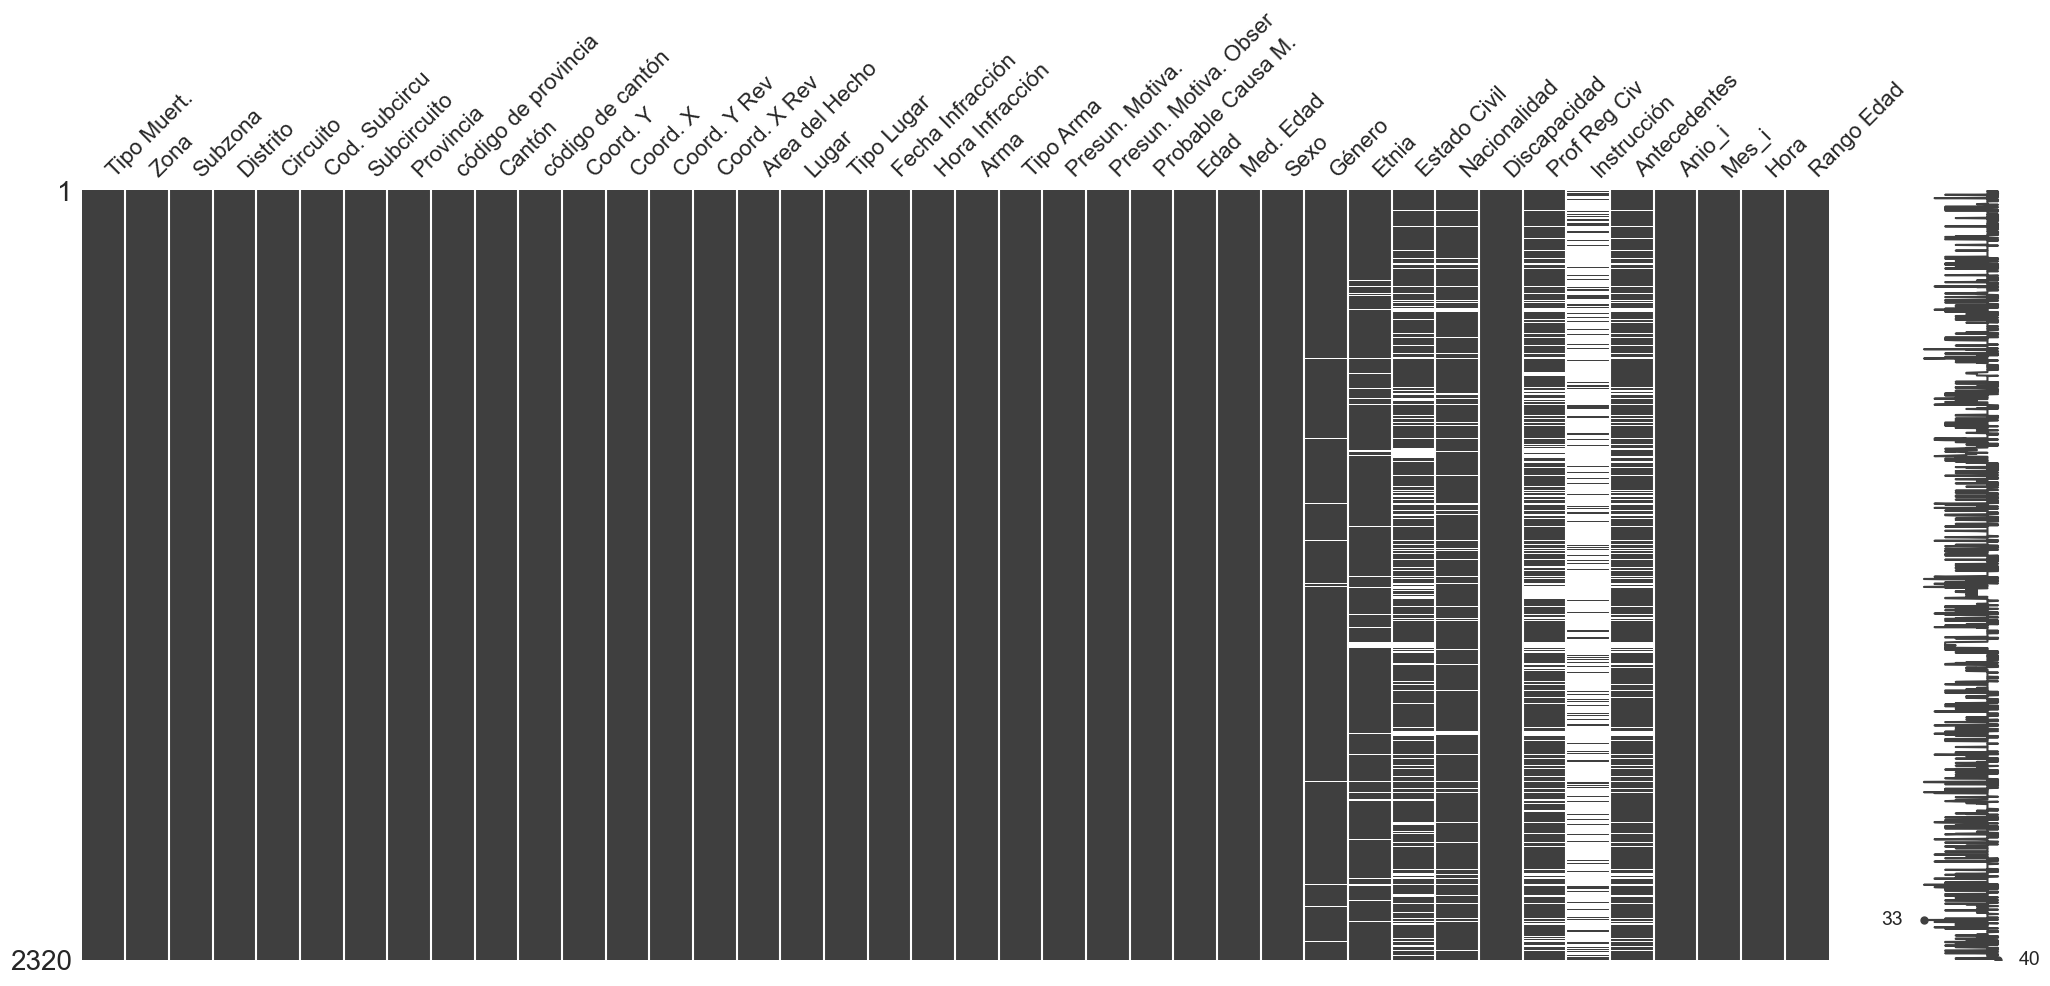

In [41]:
plt.figure(figsize=(12, 4))
sns.heatmap(data_dropna.isna(), cbar=False)
plt.title("Mapa de calor de valores faltantes")
plt.xlabel("Columnas")
plt.ylabel("Filas")
plt.show()

# Matrices de missingno
msno.matrix(data_dropna)
plt.show()

#### **Imputación de valores faltantes**

In [42]:
# MÉTODO 1: IMPUTACIÓN ALEATORIA (Random Sampling)
df_random = data_dropna.copy()

# Para cada columna, imputa con valores aleatorios de los existentes
for col in ['Antecedentes', 'Prof Reg Civ', 'Etnia', 'Género', 'Nacionalidad', 'Estado Civil']:
    # Obtener valores no nulos
    valores_validos = df_random[col].dropna()
    # Crear máscara de valores faltantes
    mask = df_random[col].isnull()
    # Imputar con valores aleatorios
    df_random.loc[mask, col] = np.random.choice(valores_validos, size=mask.sum())

print("\nDistribución después de imputación:")
print(df_random['Antecedentes'].value_counts(dropna=False))
print(df_random['Prof Reg Civ'].value_counts(dropna=False))
print(df_random['Etnia'].value_counts(dropna=False))
print(df_random['Género'].value_counts(dropna=False))
print(df_random['Nacionalidad'].value_counts(dropna=False))
print(df_random['Estado Civil'].value_counts(dropna=False))



Distribución después de imputación:
Antecedentes
NO    1524
SI     796
Name: count, dtype: int64
Prof Reg Civ
ESTUDIANTE              1330
BACHILLER                199
NINGUNA                  118
EMPLEADO                 109
OBRERO                    86
                        ... 
ECONOMISTA                 1
ACTOR                      1
TLGO. MECANICA NAVAL       1
EJECUTIVO                  1
FUNCIONARIO PUBLICO        1
Name: count, Length: 91, dtype: int64
Etnia
MESTIZO/A               2024
AFRO                     204
MULATO/A                  26
OTROS                     21
BLANCO/A                  20
MONTUBIO/A                19
ASIATICO/A                 3
INDIGENA                   3
Name: count, dtype: int64
Género
MASCULINO     2175
FEMENINO       141
TRANSEXUAL       2
TRANS            1
TRANS FEME       1
Name: count, dtype: int64
Nacionalidad
ECUADOR          2223
VENEZUELA          42
OTROS              30
COLOMBIA           19
CHINA POPULAR       1
CUBA             

In [43]:
# MÉTODO 2: IMPUTACIÓN PREDICTIVA (Random Forest)

df_ml = data_dropna.copy()

# Función para imputar con Random Forest
def impute_with_rf(data_dropna, target_col, feature_cols):
    df_temp = data_dropna.copy()
    
    # Separar datos con y sin valores faltantes
    train_data = df_temp[df_temp[target_col].notna()]
    predict_data = df_temp[df_temp[target_col].isna()]
    
    if len(predict_data) == 0:
        return df_temp
    
    # Preparar datos
    X_train = train_data[feature_cols]
    y_train = train_data[target_col]
    X_predict = predict_data[feature_cols]
    
    # Entrenar modelo
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train_encoded)
    
    # Predecir valores faltantes
    predictions = rf.predict(X_predict)
    predictions_decoded = le.inverse_transform(predictions)
    
    # Asignar predicciones
    df_temp.loc[df_temp[target_col].isna(), target_col] = predictions_decoded
    
    return df_temp

# Imputar Antecedentes basado en otras características
if df_ml['Antecedentes'].isnull().any():
    df_ml = impute_with_rf(df_ml, 'Antecedentes', ['Edad', 'Hora'])

# Imputar Prof_Reg_Civ basado en otras características
if df_ml['Prof Reg Civ'].isnull().any():
    df_ml = impute_with_rf(df_ml, 'Prof Reg Civ', ['Edad', 'Hora'])

# Imputar Etnia basado en otras características
if df_ml['Etnia'].isnull().any():
    df_ml = impute_with_rf(df_ml, 'Etnia', ['Edad', 'Hora'])

# Imputar Género basado en otras características
if df_ml['Género'].isnull().any():
    df_ml = impute_with_rf(df_ml, 'Género', ['Edad', 'Hora'])

# Imputar Nacionalidad basado en otras características
if df_ml['Nacionalidad'].isnull().any():
    df_ml = impute_with_rf(df_ml, 'Nacionalidad', ['Edad', 'Hora'])

# Imputar Estado Civil basado en otras características
if df_ml['Estado Civil'].isnull().any():
    df_ml = impute_with_rf(df_ml, 'Estado Civil', ['Edad', 'Hora'])

In [44]:
print(df_ml['Antecedentes'].value_counts(dropna=False))
print(df_ml['Prof Reg Civ'].value_counts(dropna=False))
print(df_ml['Etnia'].value_counts(dropna=False))
print(df_ml['Género'].value_counts(dropna=False))
print(df_ml['Nacionalidad'].value_counts(dropna=False))
print(df_ml['Estado Civil'].value_counts(dropna=False))


Antecedentes
NO    1561
SI     759
Name: count, dtype: int64
Prof Reg Civ
ESTUDIANTE              1327
NINGUNA                  232
BACHILLER                173
EMPLEADO                  98
OBRERO                    72
                        ... 
ACTOR                      1
AUXILIAR. ENFERMERIA       1
TLGO. MECANICA NAVAL       1
EJECUTIVO                  1
FUNCIONARIO PUBLICO        1
Name: count, Length: 91, dtype: int64
Etnia
MESTIZO/A               2025
AFRO                     202
MULATO/A                  26
OTROS                     22
BLANCO/A                  20
MONTUBIO/A                19
ASIATICO/A                 3
INDIGENA                   3
Name: count, dtype: int64
Género
MASCULINO     2175
FEMENINO       141
TRANSEXUAL       2
TRANS            1
TRANS FEME       1
Name: count, dtype: int64
Nacionalidad
ECUADOR          2197
OTROS              48
VENEZUELA          44
COLOMBIA           25
CHINA POPULAR       1
CUBA                1
ARGENTINA           1
CHILE     

In [45]:
# Porcentaje de valores faltantes por columna
missing_percent = df_ml.isna().mean() * 100
missing_table = pd.DataFrame({
    "porcentaje_na": missing_percent
}).sort_values(by="porcentaje_na", ascending=False)

print("Porcentaje de valores faltantes por columna:")
display(missing_table)

Porcentaje de valores faltantes por columna:


porcentaje_na
Instrucción                83.448276
Tipo Muert.                 0.000000
Subzona                     0.000000
Zona                        0.000000
Circuito                    0.000000
Cod. Subcircu               0.000000
Subcircuito                 0.000000
Distrito                    0.000000
Provincia                   0.000000
código de provincia         0.000000
código de cantón            0.000000
Cantón                      0.000000
Coord. X                    0.000000
Coord. Y Rev                0.000000
Coord. X Rev                0.000000
Coord. Y                    0.000000
Lugar                       0.000000
Tipo Lugar                  0.000000
Fecha Infracción            0.000000
Hora Infracción             0.000000
Arma                        0.000000
Tipo Arma                   0.000000
Presun. Motiva.             0.000000
Area del Hecho              0.000000
Presun. Motiva. Obser       0.000000
Probable Causa M.           0.000000
Med. Edad                   0.000000
Edad                        0.000000
Género                      0.000000
Etnia                       0.000000
Estado Civil                0.000000
Sexo                        0.000000
Nacionalidad                0.000000
Discapacidad                0.000000
Prof Reg Civ                0.000000
Antecedentes                0.000000
Anio_i                      0.000000
Mes_i                       0.000000
Hora                        0.000000
Rango Edad                  0.000000

In [46]:
# Porcentaje de valores faltantes por columna
missing_percent = df_random.isna().mean() * 100
missing_table = pd.DataFrame({
    "porcentaje_na": missing_percent
}).sort_values(by="porcentaje_na", ascending=False)

print("Porcentaje de valores faltantes por columna:")
display(missing_table)

Porcentaje de valores faltantes por columna:


porcentaje_na
Instrucción                83.448276
Tipo Muert.                 0.000000
Subzona                     0.000000
Zona                        0.000000
Circuito                    0.000000
Cod. Subcircu               0.000000
Subcircuito                 0.000000
Distrito                    0.000000
Provincia                   0.000000
código de provincia         0.000000
código de cantón            0.000000
Cantón                      0.000000
Coord. X                    0.000000
Coord. Y Rev                0.000000
Coord. X Rev                0.000000
Coord. Y                    0.000000
Lugar                       0.000000
Tipo Lugar                  0.000000
Fecha Infracción            0.000000
Hora Infracción             0.000000
Arma                        0.000000
Tipo Arma                   0.000000
Presun. Motiva.             0.000000
Area del Hecho              0.000000
Presun. Motiva. Obser       0.000000
Probable Causa M.           0.000000
Med. Edad                   0.000000
Edad                        0.000000
Género                      0.000000
Etnia                       0.000000
Estado Civil                0.000000
Sexo                        0.000000
Nacionalidad                0.000000
Discapacidad                0.000000
Prof Reg Civ                0.000000
Antecedentes                0.000000
Anio_i                      0.000000
Mes_i                       0.000000
Hora                        0.000000
Rango Edad                  0.000000

In [47]:
data_kill_rd = df_random.drop(columns=['Instrucción'])
data_kill_ml = df_ml.drop(columns=['Instrucción'])

In [ ]:
# Porcentaje de valores faltantes por columna
missing_percent = data_kill_rd.isna().mean() * 100 #ml y rd
missing_table = pd.DataFrame({
    "porcentaje_na": missing_percent
}).sort_values(by="porcentaje_na", ascending=False)

print("Porcentaje de valores faltantes por columna:")
display(missing_table)

Porcentaje de valores faltantes por columna:


porcentaje_na
Tipo Muert.                      0.0
Zona                             0.0
Subzona                          0.0
Distrito                         0.0
Circuito                         0.0
Cod. Subcircu                    0.0
Subcircuito                      0.0
Provincia                        0.0
código de provincia              0.0
Cantón                           0.0
código de cantón                 0.0
Coord. Y                         0.0
Coord. X                         0.0
Coord. Y Rev                     0.0
Coord. X Rev                     0.0
Area del Hecho                   0.0
Lugar                            0.0
Tipo Lugar                       0.0
Fecha Infracción                 0.0
Hora Infracción                  0.0
Arma                             0.0
Tipo Arma                        0.0
Presun. Motiva.                  0.0
Presun. Motiva. Obser            0.0
Probable Causa M.                0.0
Edad                             0.0
Med. Edad                        0.0
Sexo                             0.0
Género                           0.0
Etnia                            0.0
Estado Civil                     0.0
Nacionalidad                     0.0
Discapacidad                     0.0
Prof Reg Civ                     0.0
Antecedentes                     0.0
Anio_i                           0.0
Mes_i                            0.0
Hora                             0.0
Rango Edad                       0.0

In [51]:
data_kill_rd.to_csv('data_kill_rd.csv', index=False, encoding='utf-8')